MACHINE EXERCISE NO. 6 Clustering and Anomaly Detection

    Joshua Dela Cruz
    2023-02911



###### Table of Contents

    1  General Resources

        1.1  Libraries
        1.2  References

    2  Problem 1: Trip Advisor Travel Reviews

        2.1  Dataset
            2.1.1  Import
            2.1.2  Exploratory Analysis
            2.1.3  Visualization
            2.1.4  Obtain Features and Target
            2.1.5  EDA Insights
        2.2  (a) K-Means Clustering
            2.2.1  Search for Best K
            2.2.2  Result Visualization
        2.3  (b) K-Means Clustering with Reduced Dimension
            2.3.1  Dimensionality Reduction through PCA
            2.3.2  Search for Best K
            2.3.3  Result Visualization
        2.4  (c) Anomaly Detection
        2.5  Insights

    3  Problem 2: Anomaly Detection in a Wastewater Treatment Plant

        3.1  Dataset
            3.1.1  Import
            3.1.2  Exploratory Analysis
            3.1.3  EDA Insights
        3.2  (a) Density-Based Clustering
            3.2.1  Standardization
            3.2.2  Search for Best Parameters
        3.3  (b) Clustering with Reduced Dimension
            3.3.1  Search for Best Dimensionality Reduction
            3.3.2  Search for Best Anomaly Detection Model
                3.3.2.1  Kernel Density Estimation
                3.3.2.2  One-Class SVM
                3.3.2.3  Local Outlier Factor
        3.4  Dataset Source - Label Comparison
            3.4.1  Dataset
                3.4.1.1  Import
            3.4.2  Preparation
            3.4.3  Testing
                3.4.3.1  Kernel Density Estimation
                3.4.3.2  One-Class SVM
                3.4.3.3  Local Outlier Factor
        3.5  Insights

## General Resources

### Libraries

In [1]:
# Data importation and manipulation
import os 
import pandas as pd
import numpy as np

In [2]:
# Model creation, calculation and test
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import OneClassSVM

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import GridSearchCV

In [3]:
# Dimensionality Reduction Libraries
from sklearn.decomposition import PCA, KernelPCA
from sklearn import manifold

In [4]:
# Data visualization, exploratory and result analysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [5]:
# Auxilliaries
from time import time
from datetime import datetime, timedelta
from collections import defaultdict

In [6]:
color = 'dark:green'
distribution_line_color = sns.color_palette("dark:green")[2]
colors_palette = sns.color_palette('Set2')

In [7]:
import warnings

# Suppress 'deprecated' warnings, added in final run to clean notebook when printing into pdf
warnings.filterwarnings("ignore")

### References

     - Problem 1 data source and description: https://archive.ics.uci.edu/dataset/484/travel+reviews
     - Problem 2 data source and description: https://archive.ics.uci.edu/dataset/106/water+treatment+plant
     
     - Utilized ChatGPT to formulate code for expanding date ranges (Section 3.4.2)

## Problem 1: Trip Advisor Travel Reviews

    This data set is populated by crawling TripAdvisor.com. Reviews on destinations in 10 categories mentioned across East Asia are considered. 
    Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0) and average rating is used against each category per user.
    
    Attribute 1 : Unique user id
    Attribute 2 : Average user feedback on art galleries
    Attribute 3 : Average user feedback on dance clubs
    Attribute 4 : Average user feedback on juice bars
    Attribute 5 : Average user feedback on restaurants
    Attribute 6 : Average user feedback on museums
    Attribute 7 : Average user feedback on resorts
    Attribute 8 : Average user feedback on parks/picnic spots
    Attribute 9 : Average user feedback on beaches
    Attribute 10 : Average user feedback on theaters
    Attribute 11 : Average user feedback on religious institutions

######    Main Objective:
    Find users with similar or dissimilar rating patterns

### Dataset

#### Import

In [8]:
def import_csv_dataset(file_path, header_ind):
    df = pd.read_csv(file_path, header=header_ind, encoding='latin-1')
    return df

In [9]:
travel_reviews_data = r"C:\Users\Josh\000 Files\003 Mengg AI\01b 221 (AI)\01 Machine Exercises\06 Clustering\tripadvisor_review.csv"
travel_reviews_df = import_csv_dataset(travel_reviews_data, 0)

In [10]:
travel_reviews_df

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


#### Exploratory Analysis

In [11]:
travel_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [12]:
travel_reviews_df.isna().sum()

User ID        0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64

In [13]:
travel_reviews_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Category 1,980.0,0.893194,0.326912,0.34,0.67,0.83,1.0200,3.22
Category 2,980.0,1.352612,0.478280,0.00,1.08,1.28,1.5600,3.64
Category 3,980.0,1.013306,0.788607,0.13,0.27,0.82,1.5725,3.62
Category 4,980.0,0.532500,0.279731,0.15,0.41,0.50,0.5800,3.44
Category 5,980.0,0.939735,0.437430,0.06,0.64,0.90,1.2000,3.30
Category 6,980.0,1.842898,0.539538,0.14,1.46,1.80,2.2000,3.76
Category 7,980.0,3.180939,0.007824,3.16,3.18,3.18,3.1800,3.21
Category 8,980.0,2.835061,0.137505,2.42,2.74,2.82,2.9100,3.39
Category 9,980.0,1.569439,0.364629,0.74,1.31,1.54,1.7600,3.17
Category 10,980.0,2.799224,0.321380,2.14,2.54,2.78,3.0400,3.66


#### Visualization

In [14]:
travel_features_df = travel_reviews_df.drop(columns=['User ID'])

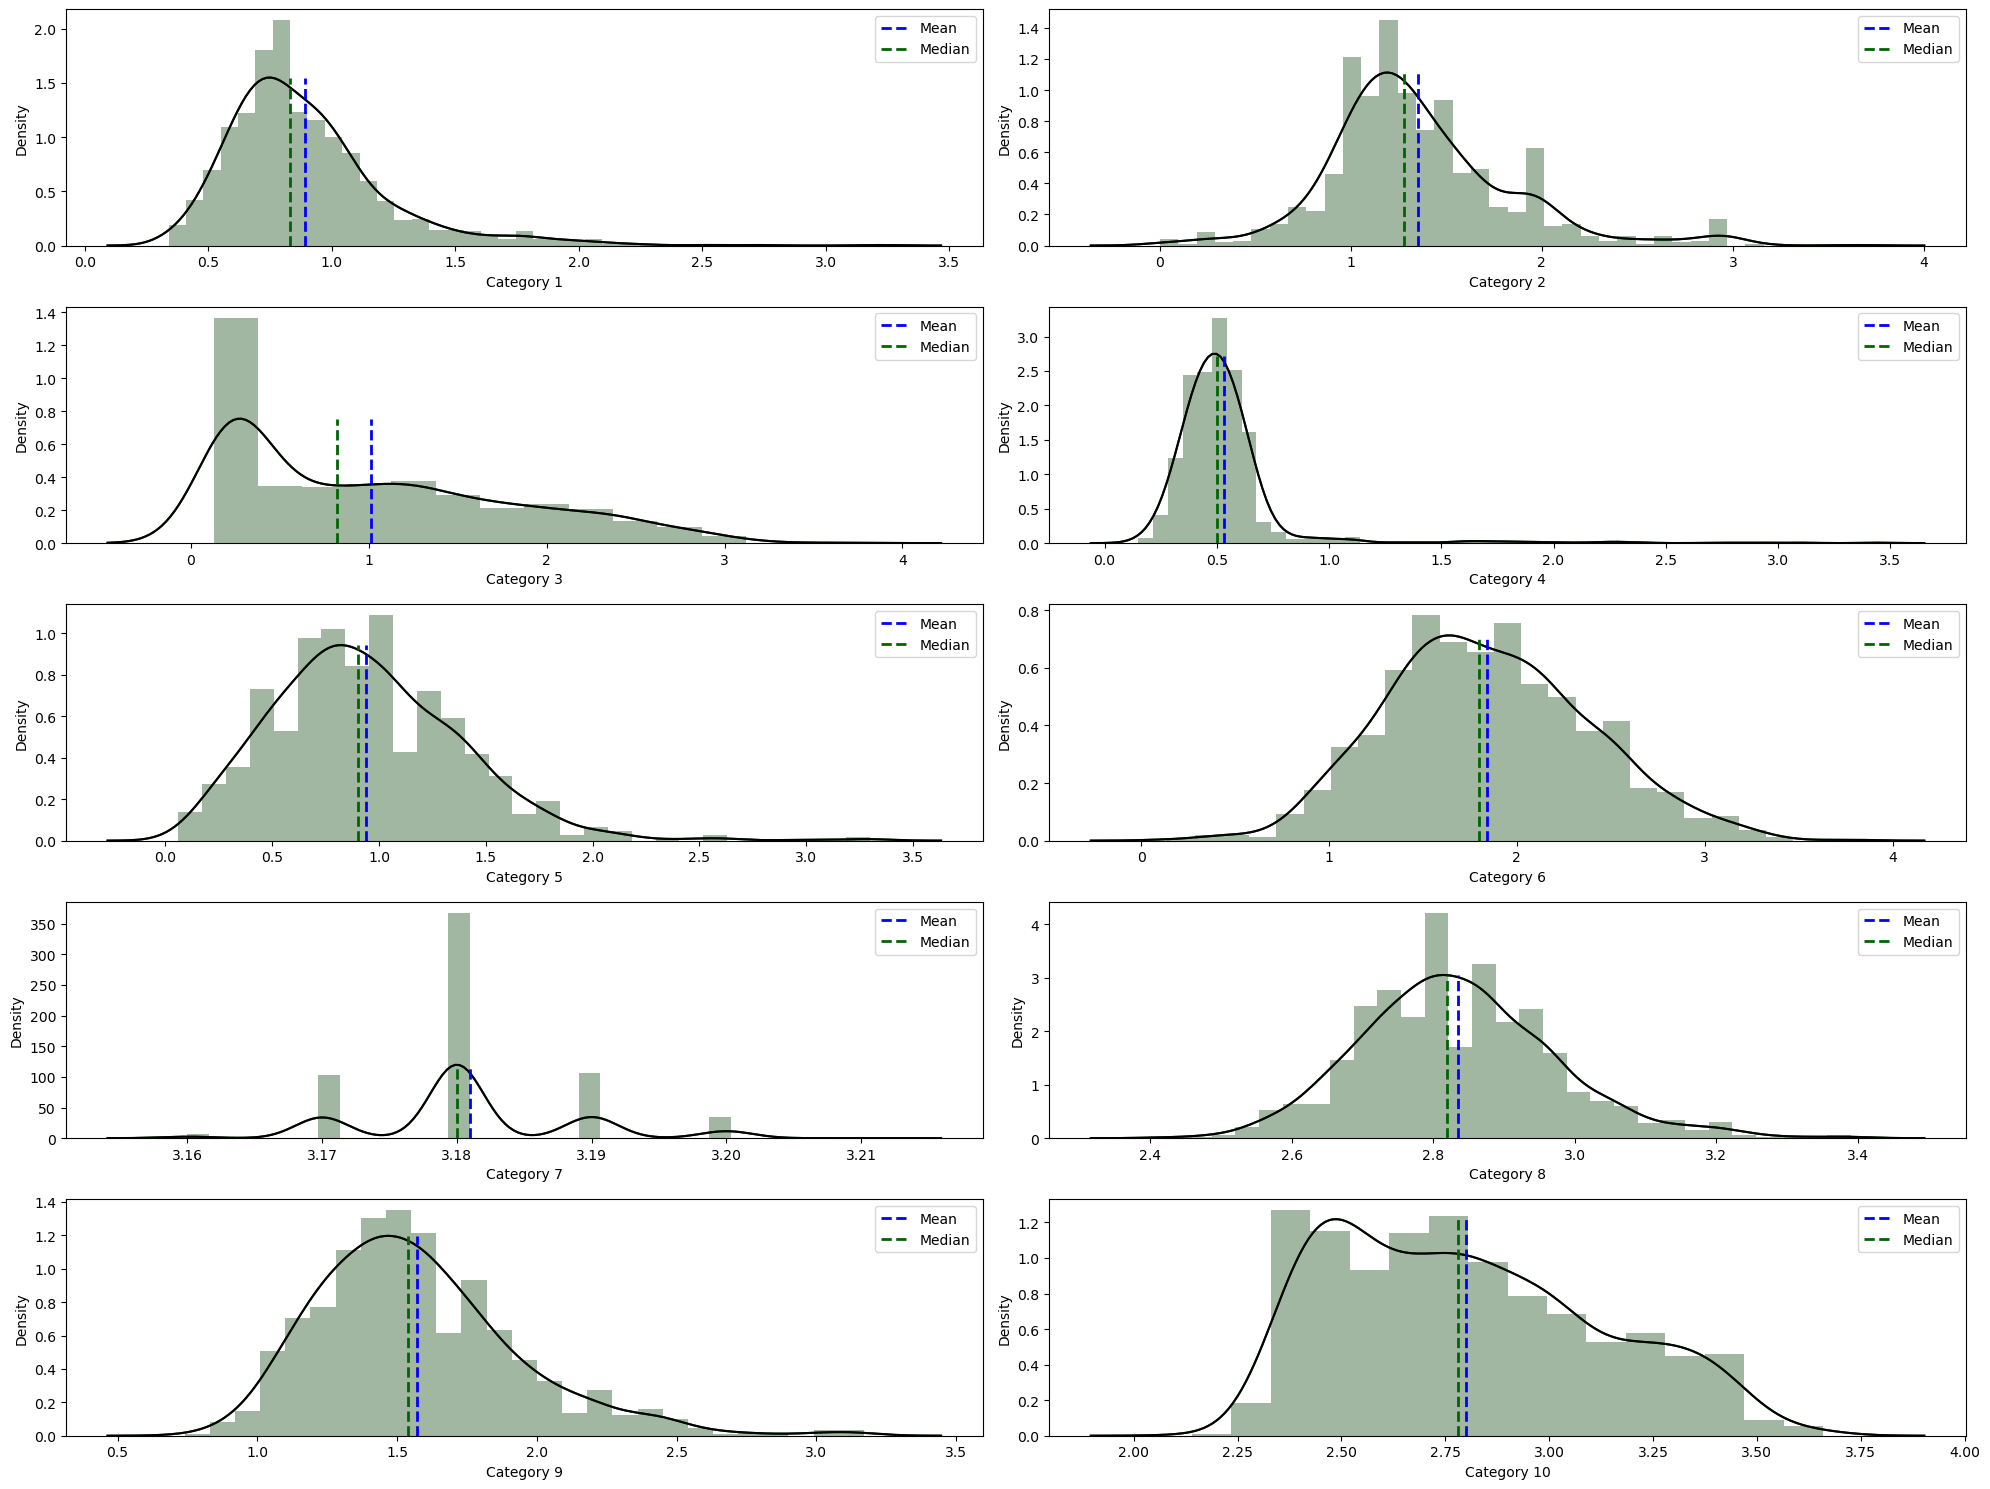

In [15]:
fig = plt.figure(figsize=(20, 15))
for index, column in enumerate(travel_features_df.columns):
    plt.subplot(5, 2, index + 1)
    feature = travel_features_df[column]
    sns.distplot(travel_features_df[column], color = distribution_line_color)
    
    mean_val = feature.mean()
    median_val = feature.median()
    max_density = sns.kdeplot(feature, color='black').get_lines()[0].get_data()[1].max()
    
    plt.plot([mean_val, mean_val], [0, max_density], color='blue', linestyle='dashed', linewidth=2, label='Mean')  
    plt.plot([median_val, median_val], [0, max_density], color='darkgreen', linestyle='dashed', linewidth=2, label='Median')  
#     plt.title(f'{column.title()}')
    plt.legend()
    plt.tight_layout()
    
plt.show()

#### Obtain Features and Target

In [16]:
# Extract the attributes from the dataframe
x = travel_features_df.to_numpy()

In [17]:
print(x.shape)

(980, 10)


#### EDA Insights

    1. No null data.
    2. Features are within the same range of values as expected.
    3. Most features have relatively normal distribution except for the Category 7 which seems to have 3 peaks. There may also be few univariate outliers in the data especially seen on the graph of Category 1 and 4 as there were some values that lie on the extreme right-hand side. 

### (a) K-Means Clustering

#### Search for Best K

In [18]:
def perform_kmeans(K, x):
    kmeans = KMeans(n_clusters=K, 
                    init='k-means++', 
                    n_init=10, 
                    random_state=0)
    kmeans.fit(x)
    
    cluster_labels = kmeans.labels_
    silhouette_values = silhouette_samples(x, cluster_labels)
    silhouette_avg = silhouette_score(x, cluster_labels)
    
    return cluster_labels, silhouette_values, silhouette_avg

In [19]:
def search_best_K(max_K, step, x, graph_ind):

    silhouette_scores = []
    best_K =-np.inf
    best_silhouette_avg =-np.inf
    
    for K in range(2, max_K + 1, step):

        _, _, silhouette_avg = perform_kmeans(K, x)
        
        if graph_ind == True:
            print(f"\t K: {K}, Average Silhouette Score: {silhouette_avg}")
            
        silhouette_scores.append(silhouette_avg)

        if silhouette_avg > best_silhouette_avg:
            best_silhouette_avg = silhouette_avg
            best_K = K
    
    if graph_ind == True:
        # Plotting the silhouette scores
        plt.figure(figsize=(6, 4))
        plt.plot(range(2, max_K + 1, step), silhouette_scores, marker='o', linestyle='-', color='#17B970')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('Silhouette Score')
        plt.title('Silhouette Score vs. Number of Clusters')
        plt.grid(True)
        plt.show()

    return best_K, best_silhouette_avg

In [20]:
# Set parameters
max_K_a = 10
step_a = 1  

	 K: 2, Average Silhouette Score: 0.3008527930106379
	 K: 3, Average Silhouette Score: 0.20572830775140485
	 K: 4, Average Silhouette Score: 0.16899844986603454
	 K: 5, Average Silhouette Score: 0.16424932777964485
	 K: 6, Average Silhouette Score: 0.16171622375518938
	 K: 7, Average Silhouette Score: 0.1644369050986805
	 K: 8, Average Silhouette Score: 0.16767214968448785
	 K: 9, Average Silhouette Score: 0.16694897791028554
	 K: 10, Average Silhouette Score: 0.16722722270472193


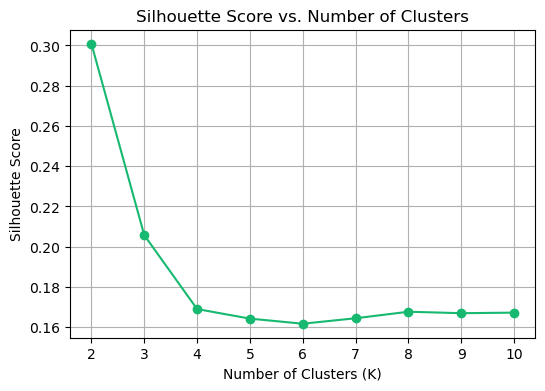

In [21]:
best_K_a, best_silhouette_avg_a = search_best_K(max_K_a, step_a, x, True)

In [22]:
print(f"Best K: {best_K_a}, Best Silhouette Score: {best_silhouette_avg_a}")

Best K: 2, Best Silhouette Score: 0.3008527930106379


#### Result Visualization

In [23]:
# Refit model with best K
cluster_labels_a, best_silhouette_values_a, best_silhouette_avg_a = perform_kmeans(best_K_a, x)

In [24]:
def plot_silhouette_score(x, K, silhouette_values, silhouette_avg, cluster_labels):
    
    user, _ = x.shape
    min_sil = min(silhouette_values)
    max_sil = max(silhouette_values)
    
    counter = 0
    fig = plt.figure(figsize=(6,5))
    for i in range(0,K):
        sil = silhouette_values[cluster_labels == i]
        plt.bar(np.arange(counter,counter + sil.size),sil, color=colors_palette[i])
        counter = counter + sil.size
    
#     sns.set_palette(color_theme)
    plt.axis([0, user, min_sil, max_sil])
    plt.xlabel('User')
    plt.ylabel('Silhouette Score')
    plt.title("Bar Plot for Silhouette Score")
    plt.show()
    
    print("\t Average Silhouette Score: ", silhouette_avg)

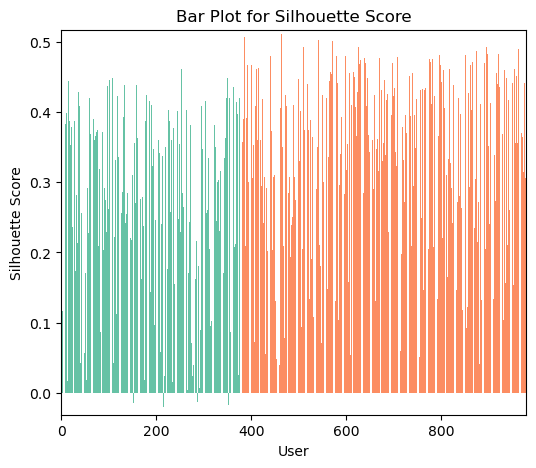

	 Average Silhouette Score:  0.3008527930106379


In [25]:
plot_silhouette_score(x, best_K_a, best_silhouette_values_a, best_silhouette_avg_a, cluster_labels_a)

### (b) K-Means Clustering with Reduced Dimension

#### Dimensionality Reduction through PCA

In [26]:
def perform_PCA(x, y, target, df):
    
    # Perform PCA to view the CPV plot
    pca = PCA(n_components=target).fit(x)
    var = pca.explained_variance_ratio_
    cpv = np.cumsum(var)*100
    plt.plot(np.arange(cpv.size)+1,cpv,'go-')
    plt.title('Cumulative % Variance')
    plt.xlabel('No. of Principal Components')
    plt.ylabel('CPV (%)')
    plt.show()
    
    # Get the transformed features
    pca.fit(x)
    pca_x = pca.transform(x)

    # Get the explained variance ratio and cumulative sum
    print(f"Cumulative % Variance:\n", cpv)
    
    # Find the number of components that explain the target variance
    # Used when declaring the target variance and not the number of components
#     n_components = len(cpv)

#     # Retain the top components that make up the target variance
#     pca_x = pca_x[:, :n_components]
    
    value = 'complete' if target == None else target
    
    print(f"\tShape of image before PCA: {x.shape}") 
    print(f"\tShape of image after PCA: {pca_x.shape}") 
    print(f"\tCPV at {value} PCs: {round(100*np.sum(pca.explained_variance_ratio_), 4)}%")
        
    return pca_x, y

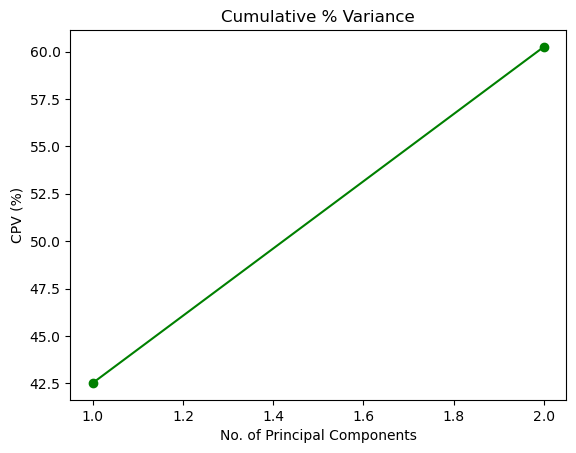

Cumulative % Variance:
 [42.52009001 60.24323374]
	Shape of image before PCA: (980, 10)
	Shape of image after PCA: (980, 2)
	CPV at 2 PCs: 60.2432%


In [27]:
pca_x, _ = perform_PCA(x, _, 2, travel_features_df)

#### Search for Best K

In [28]:
# Set parameters
max_K_b = 10
step_b = 1  

	 K: 2, Average Silhouette Score: 0.47719651824896336
	 K: 3, Average Silhouette Score: 0.3962303968153403
	 K: 4, Average Silhouette Score: 0.3648539499451879
	 K: 5, Average Silhouette Score: 0.3966628067514421
	 K: 6, Average Silhouette Score: 0.3936106263856066
	 K: 7, Average Silhouette Score: 0.3720393401023785
	 K: 8, Average Silhouette Score: 0.3714894115531272
	 K: 9, Average Silhouette Score: 0.38574865943205566
	 K: 10, Average Silhouette Score: 0.38190963525925575


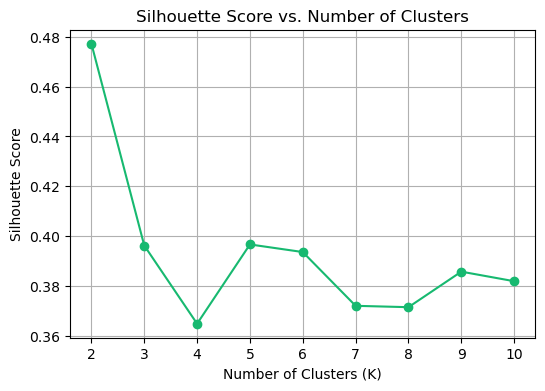

In [29]:
best_K_b, best_silhouette_avg_b = search_best_K(max_K_b, step_b, pca_x, True)

In [30]:
print(f"Best K: {best_K_b}, Best Silhouette Score: {best_silhouette_avg_b}")

Best K: 2, Best Silhouette Score: 0.47719651824896336


#### Result Visualization

In [31]:
# Refit model with best K
cluster_labels_b, best_silhouette_values_b, best_silhouette_avg_b = perform_kmeans(best_K_b, pca_x)

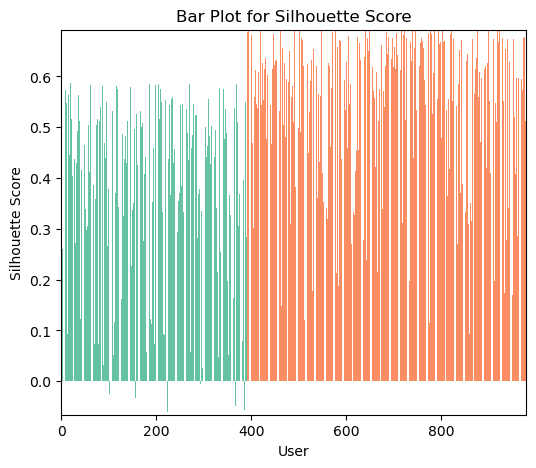

	 Average Silhouette Score:  0.47719651824896336


In [32]:
plot_silhouette_score(pca_x, best_K_b, best_silhouette_values_b, best_silhouette_avg_b, cluster_labels_b)

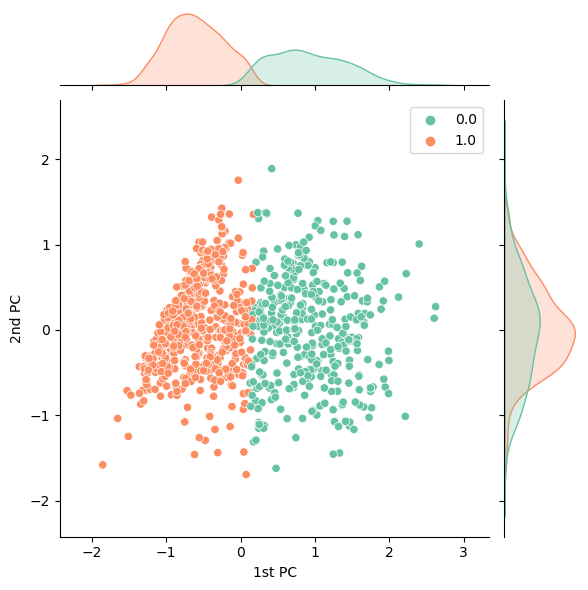

In [33]:
pca_df = pd.DataFrame(data=np.c_[pca_x, cluster_labels_b],
                  columns=['1st PC','2nd PC','labels'])
sns.jointplot(data=pca_df, x="1st PC", y="2nd PC", hue="labels", palette=colors_palette)
plt.legend()
plt.show()

### (c) Anomaly Detection

In [34]:
def anomaly_detection(X, model, model_name, graph_ind):
    mesh_limit = np.max(X)
    
    # Make a meshgrid for plotting surfaces
    Xp, Yp = np.meshgrid(np.linspace(-mesh_limit,mesh_limit),np.linspace(-mesh_limit,mesh_limit))
    XY = np.vstack([Xp.ravel(), Yp.ravel()]).T
    
    # Generate the KDE surface as Z
    fitted_model = model.fit(X)
    Zp = np.exp(fitted_model.score_samples(XY))
    Zp = Zp.reshape(Xp.shape)
    
    if model_name == "KDE":
        # Establish a confidence level of 95% (or 5% cutoff) 
        # for the UCL using the quantile of kde_scores.
        scores = fitted_model.score_samples(X)
        threshold = np.quantile(scores,0.05)
        
        if graph_ind == True:
            print(f"\t Threshold (KDE) = {np.exp(threshold)}")

        # Get the anomalous data points
        normals = X[scores > threshold,:]
        anomals = X[scores <= threshold,:]
        
    else:
        y_pred = fitted_model.predict(X)
        normals = X[y_pred == 1,:]
        anomals = X[y_pred == -1,:]
    
    if graph_ind == True:
        cntr = plt.contourf(Xp, Yp, Zp, cmap='Greens_r')
        plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
        
        if model_name == "KDE":
            plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (95% Confidence)')
        else:
            plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies')
            
        plt.title(f'Anomaly Detection using {model_name}')
        plt.colorbar(cntr)
        plt.legend()
        plt.grid()
        plt.show()
    
    return fitted_model, normals, anomals

	 Threshold (KDE) = 0.03779439970064464


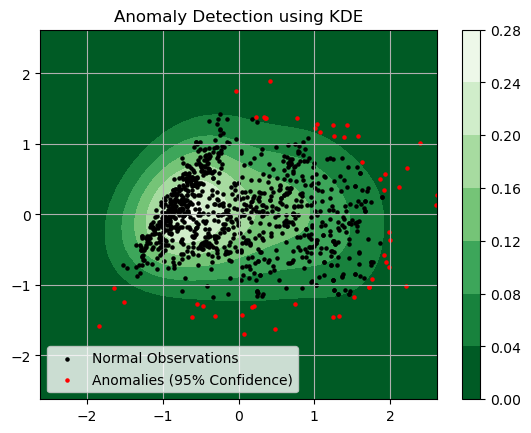

In [35]:
kde_fitted_model, kde_norm, kde_anorm = anomaly_detection(pca_x, KernelDensity(kernel='gaussian',bandwidth=0.45), 'KDE', True)

### Insights

    1. With the complete 10-feature data, the maximum silhouette score obtained is just around ~0.30 yung k = 2. This seemed to continuously decline as we increase K. The initial bar plot of the silhouette score for each user also showed that around less than 400 users belong to the same cluster, while the remaining 500+ belong to the other.
    
    2. After using PCA with 2 components, a very small cumulative variance of 60.24% was obtained. But apparently, this was enough to increase the silhouette score from ~0.30 obtain in item (a) to 0.477. The bar plot of each user remaining to be still the same indicating that the number of clustered user may have remained similar but they were just wrongly grouped in the first item. Additionally, the scatter plot of principal components revealed how the two clusters were highly separable with respect to PC1. 
    
    3. By performing a Kernel Density Estimation, a few outliers could be seen. This may support the initial idea obtained in analyzing the values of each categories.

## Problem 2: Anomaly Detection in a Wastewater Treatment Plant

###### Originally "Faults in a urban waste water treatment plant"

    This dataset comes from the daily measures of sensors in a urban waste water treatment plant. The objective is to classify the operational state of the plant in order to predict faults through the state  variables of the plant at each of the stages of the treatment process. This domain has been stated as an ill-structured domain. 
    
    -- Creators: Manel Poch (igte2@cc.uab.es)
     Unitat d'Enginyeria Quimica
     Universitat Autonoma de Barcelona. Bellaterra. Barcelona; Spain
    -- Donor: Javier Bejar and Ulises Cortes (bejar@lsi.upc.es)
         Dept. Llenguatges i Sistemes Informatics;
         Universitat Politecnica de Catalunya. Barcelona; Spain
    -- Date: June, 1993

    N.  Attrib.    
     1  Q-E        (input flow to plant)  
     2  ZN-E       (input Zinc to plant)
     3  PH-E       (input pH to plant) 
     4  DBO-E      (input Biological demand of oxygen to plant) 
     5  DQO-E      (input chemical demand of oxygen to plant)
     6  SS-E       (input suspended solids to plant)  
     7  SSV-E      (input volatile supended solids to plant)
     8  SED-E      (input sediments to plant) 
     9  COND-E     (input conductivity to plant) 
    10  PH-P       (input pH to primary settler)
    11  DBO-P      (input Biological demand of oxygen to primary settler)
    12  SS-P       (input suspended solids to primary settler)
    13  SSV-P      (input volatile supended solids to primary settler)
    14  SED-P      (input sediments to primary settler) 
    15  COND-P     (input conductivity to primary settler)
    16  PH-D       (input pH to secondary settler) 
    17  DBO-D      (input Biological demand of oxygen to secondary settler)
    18  DQO-D      (input chemical demand of oxygen to secondary settler)
    19  SS-D       (input suspended solids to secondary settler)
    20  SSV-D      (input volatile supended solids to secondary settler)
    21  SED-D      (input sediments to secondary settler)  
    22  COND-D     (input conductivity to secondary settler) 
    23  PH-S       (output pH)   
    24  DBO-S      (output Biological demand of oxygen)
    25  DQO-S      (output chemical demand of oxygen)
    26  SS-S       (output suspended solids)
    27  SSV-S      (output volatile supended solids) 
    28  SED-S      (output sediments) 
    29  COND-S     (output conductivity)
    30  RD-DBO-P   (performance input Biological demand of oxygen in primary settler)
    31  RD-SS-P    (performance input suspended solids to primary settler)
    32  RD-SED-P   (performance input sediments to primary settler)
    33  RD-DBO-S   (performance input Biological demand of oxygen to secondary settler)
    34  RD-DQO-S   (performance input chemical demand of oxygen to secondary settler)
    35  RD-DBO-G   (global performance input Biological demand of oxygen)
    36  RD-DQO-G   (global performance input chemical demand of oxygen)
    37  RD-SS-G    (global performance input suspended solids) 
    38  RD-SED-G   (global performance input sediments)

###### Main Objective:
    Find days when we suspect anomalies in operation.

### Dataset

#### Import

In [36]:
waste_water_data = r"C:\Users\Josh\000 Files\003 Mengg AI\01b 221 (AI)\01 Machine Exercises\06 Clustering\water-treatment.data"
waste_water_df = import_csv_dataset(waste_water_data, None)

In [37]:
waste_water_df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4.0,988,...,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922,0.30,7.4,139,367,180,64.4,3.0,1060,...,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,D-29/8/91,32190,0.30,7.3,200,545,258,65.1,4.0,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


#### Exploratory Analysis

In [38]:
waste_water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       527 non-null    object 
 1   1       527 non-null    object 
 2   2       527 non-null    object 
 3   3       527 non-null    float64
 4   4       527 non-null    object 
 5   5       527 non-null    object 
 6   6       527 non-null    object 
 7   7       527 non-null    object 
 8   8       527 non-null    object 
 9   9       527 non-null    int64  
 10  10      527 non-null    float64
 11  11      527 non-null    object 
 12  12      527 non-null    int64  
 13  13      527 non-null    object 
 14  14      527 non-null    object 
 15  15      527 non-null    int64  
 16  16      527 non-null    float64
 17  17      527 non-null    object 
 18  18      527 non-null    object 
 19  19      527 non-null    object 
 20  20      527 non-null    object 
 21  21      527 non-null    object 
 22  22

In [39]:
question_mark_counts = waste_water_df.apply(lambda x: x.eq("?").sum())

# Display the counts
print("Number of '?' for each column:")
print(question_mark_counts)

Number of '?' for each column:
0      0
1     18
2      3
3      0
4     23
5      6
6      1
7     11
8     25
9      0
10     0
11    40
12     0
13    11
14    24
15     0
16     0
17    28
18     9
19     2
20    13
21    25
22     0
23     1
24    23
25    18
26     5
27    17
28    28
29     1
30    62
31     4
32    27
33    40
34    26
35    36
36    25
37     8
38    31
dtype: int64


In [40]:
# Obtain features data
waste_water_features_df = waste_water_df.drop(columns=[0])

In [41]:
# Replace "?" with NaN
nan_ww_df = waste_water_features_df.replace("?",pd.NA)

# Convert columns to numeric
nan_ww_df = nan_ww_df.apply(pd.to_numeric, errors='ignore')

# # Drop rows with NaN
# dropped_ww_df = nan_ww_df.dropna().reset_index(drop=True)

# Replace NaN values with the mean of each column
filled_ww_df = nan_ww_df.fillna(nan_ww_df.mean())

In [42]:
samples, features_n = filled_ww_df.shape
filled_ww_df.shape

(527, 38)

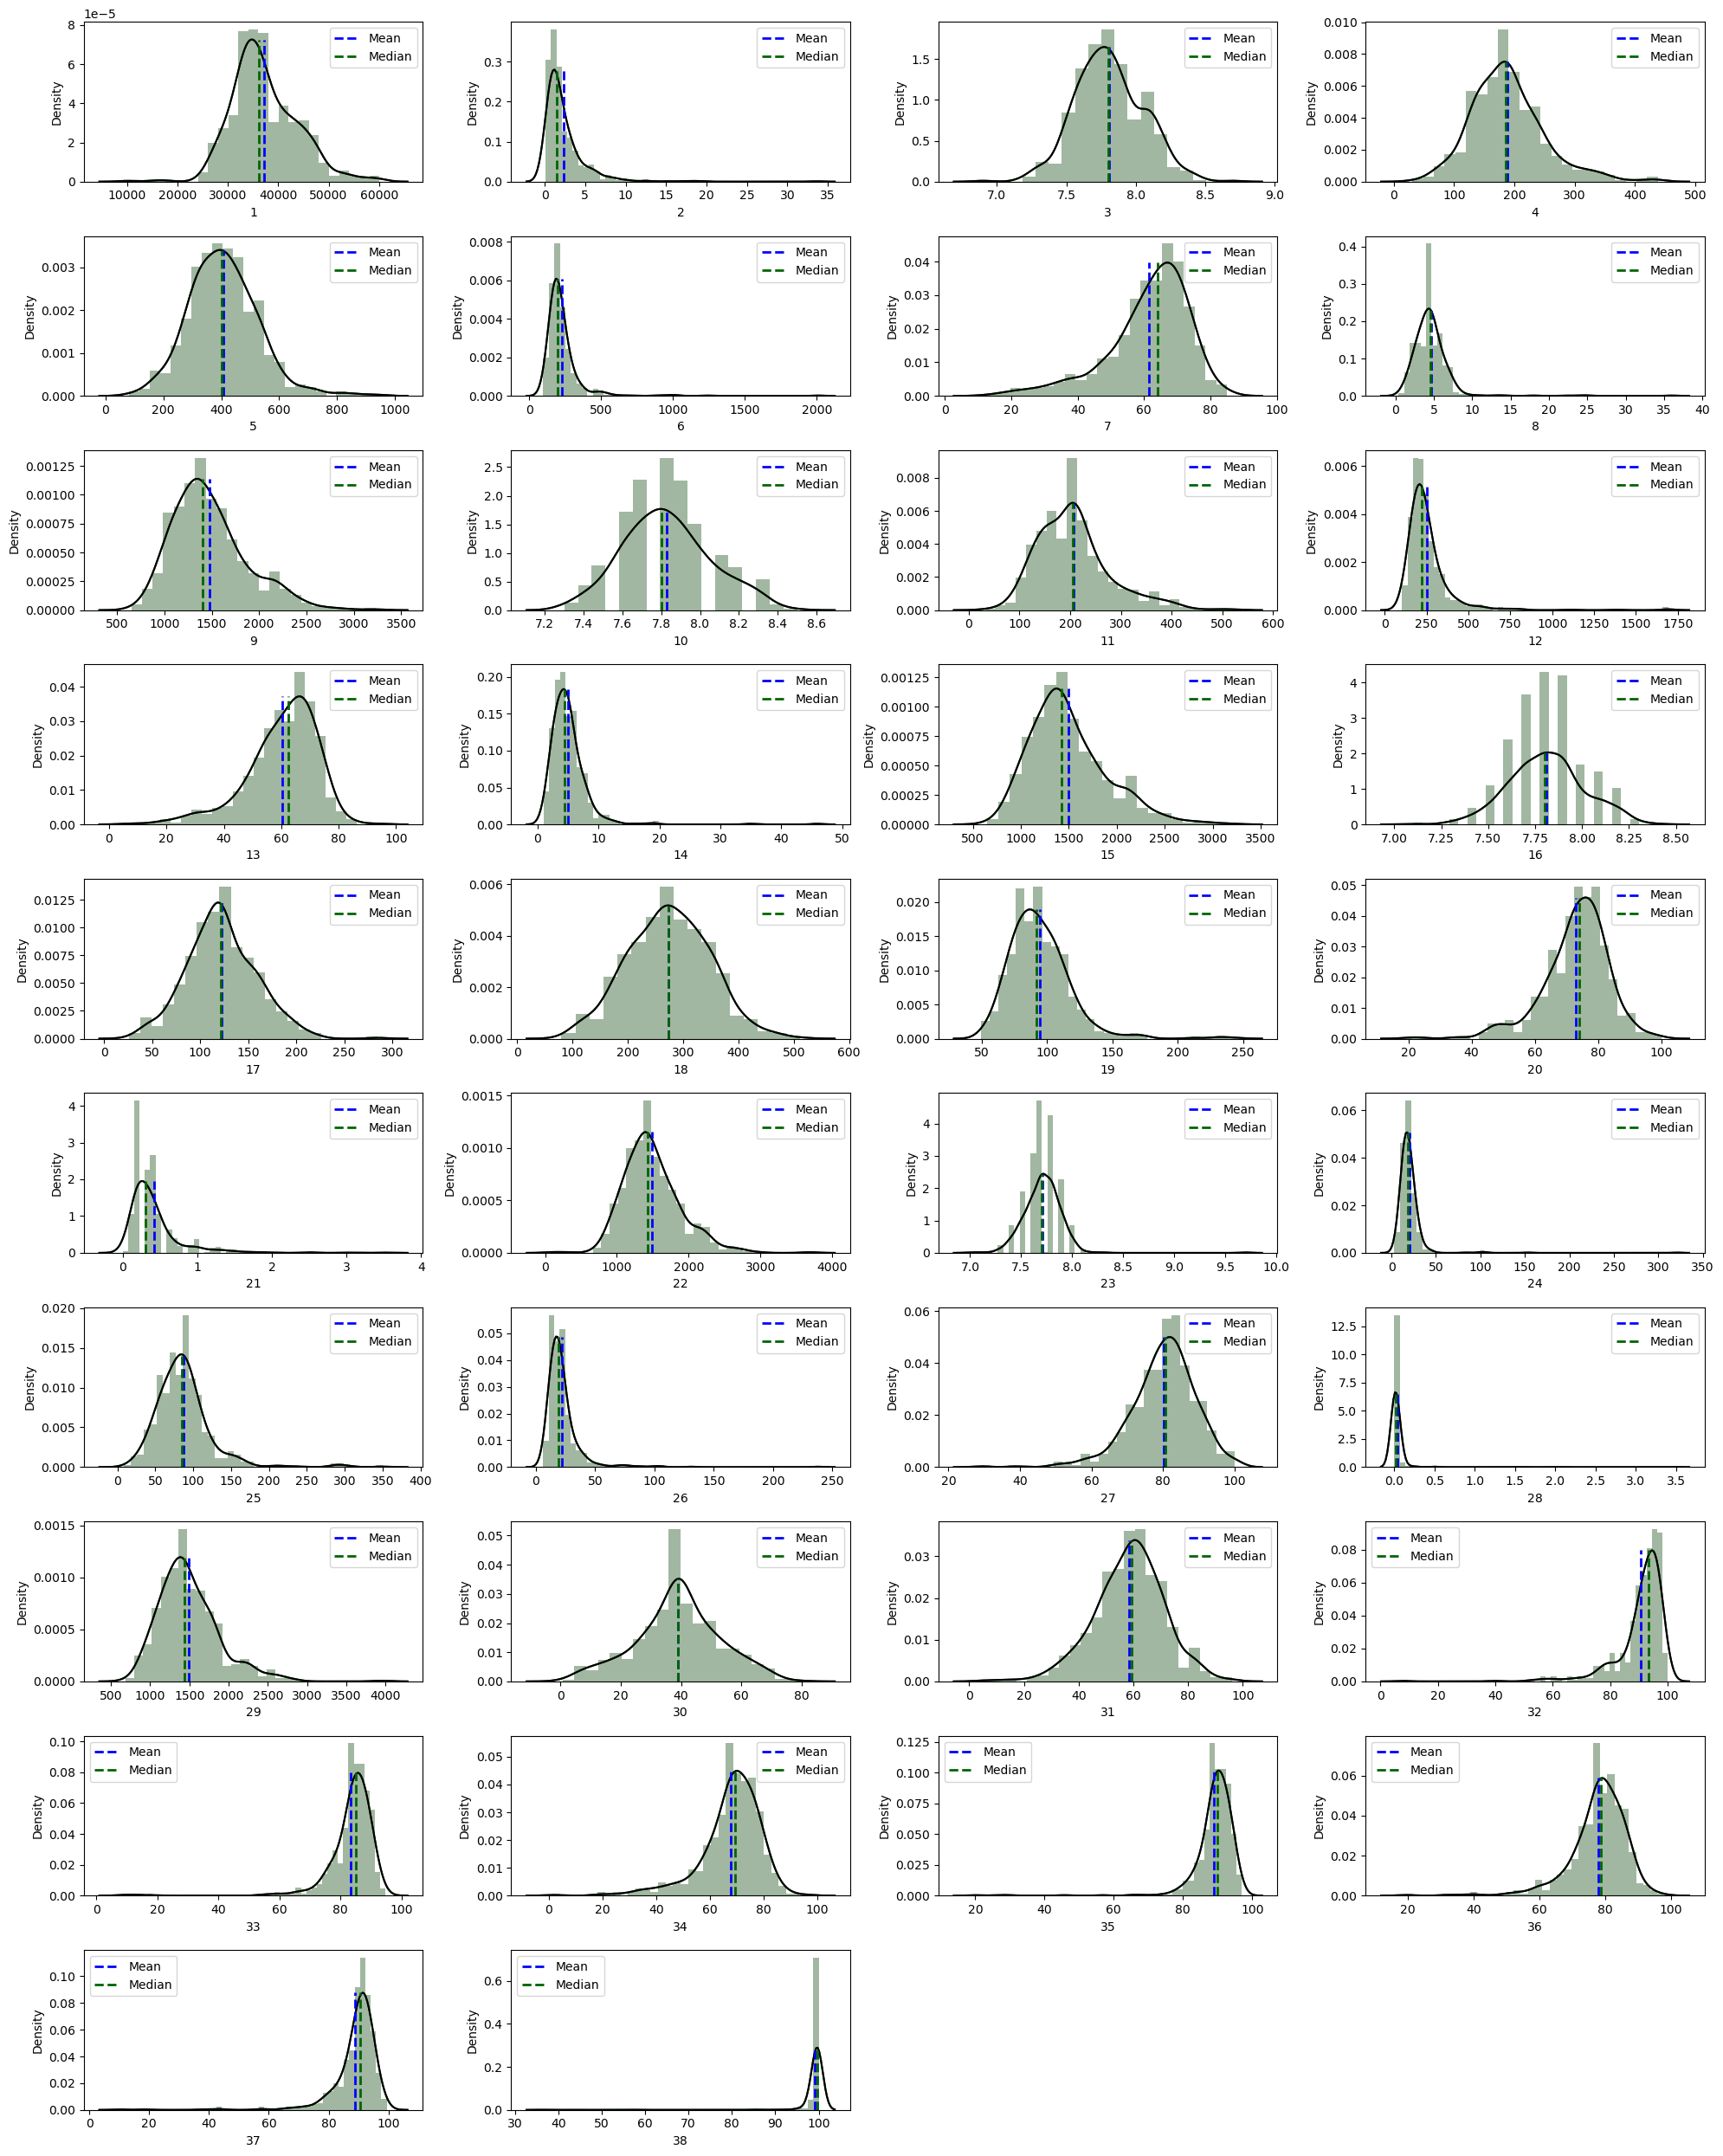

In [43]:
fig = plt.figure(figsize=(20, 25))
for index, column in enumerate(filled_ww_df.columns):
    plt.subplot(10, 4, index + 1)
    
    feature = pd.to_numeric(filled_ww_df[column], errors='coerce')  # Convert column to numeric
    sns.distplot(filled_ww_df[column], color = distribution_line_color)
    
    mean_val = feature.mean()
    median_val = feature.median()
    max_density = sns.kdeplot(feature, color='black').get_lines()[0].get_data()[1].max()
    
    plt.plot([mean_val, mean_val], [0, max_density], color='blue', linestyle='dashed', linewidth=2, label='Mean')  
    plt.plot([median_val, median_val], [0, max_density], color='darkgreen', linestyle='dashed', linewidth=2, label='Median')  
#     plt.title(f'{column.title()}')
    plt.legend()
    plt.tight_layout()
    
plt.show()

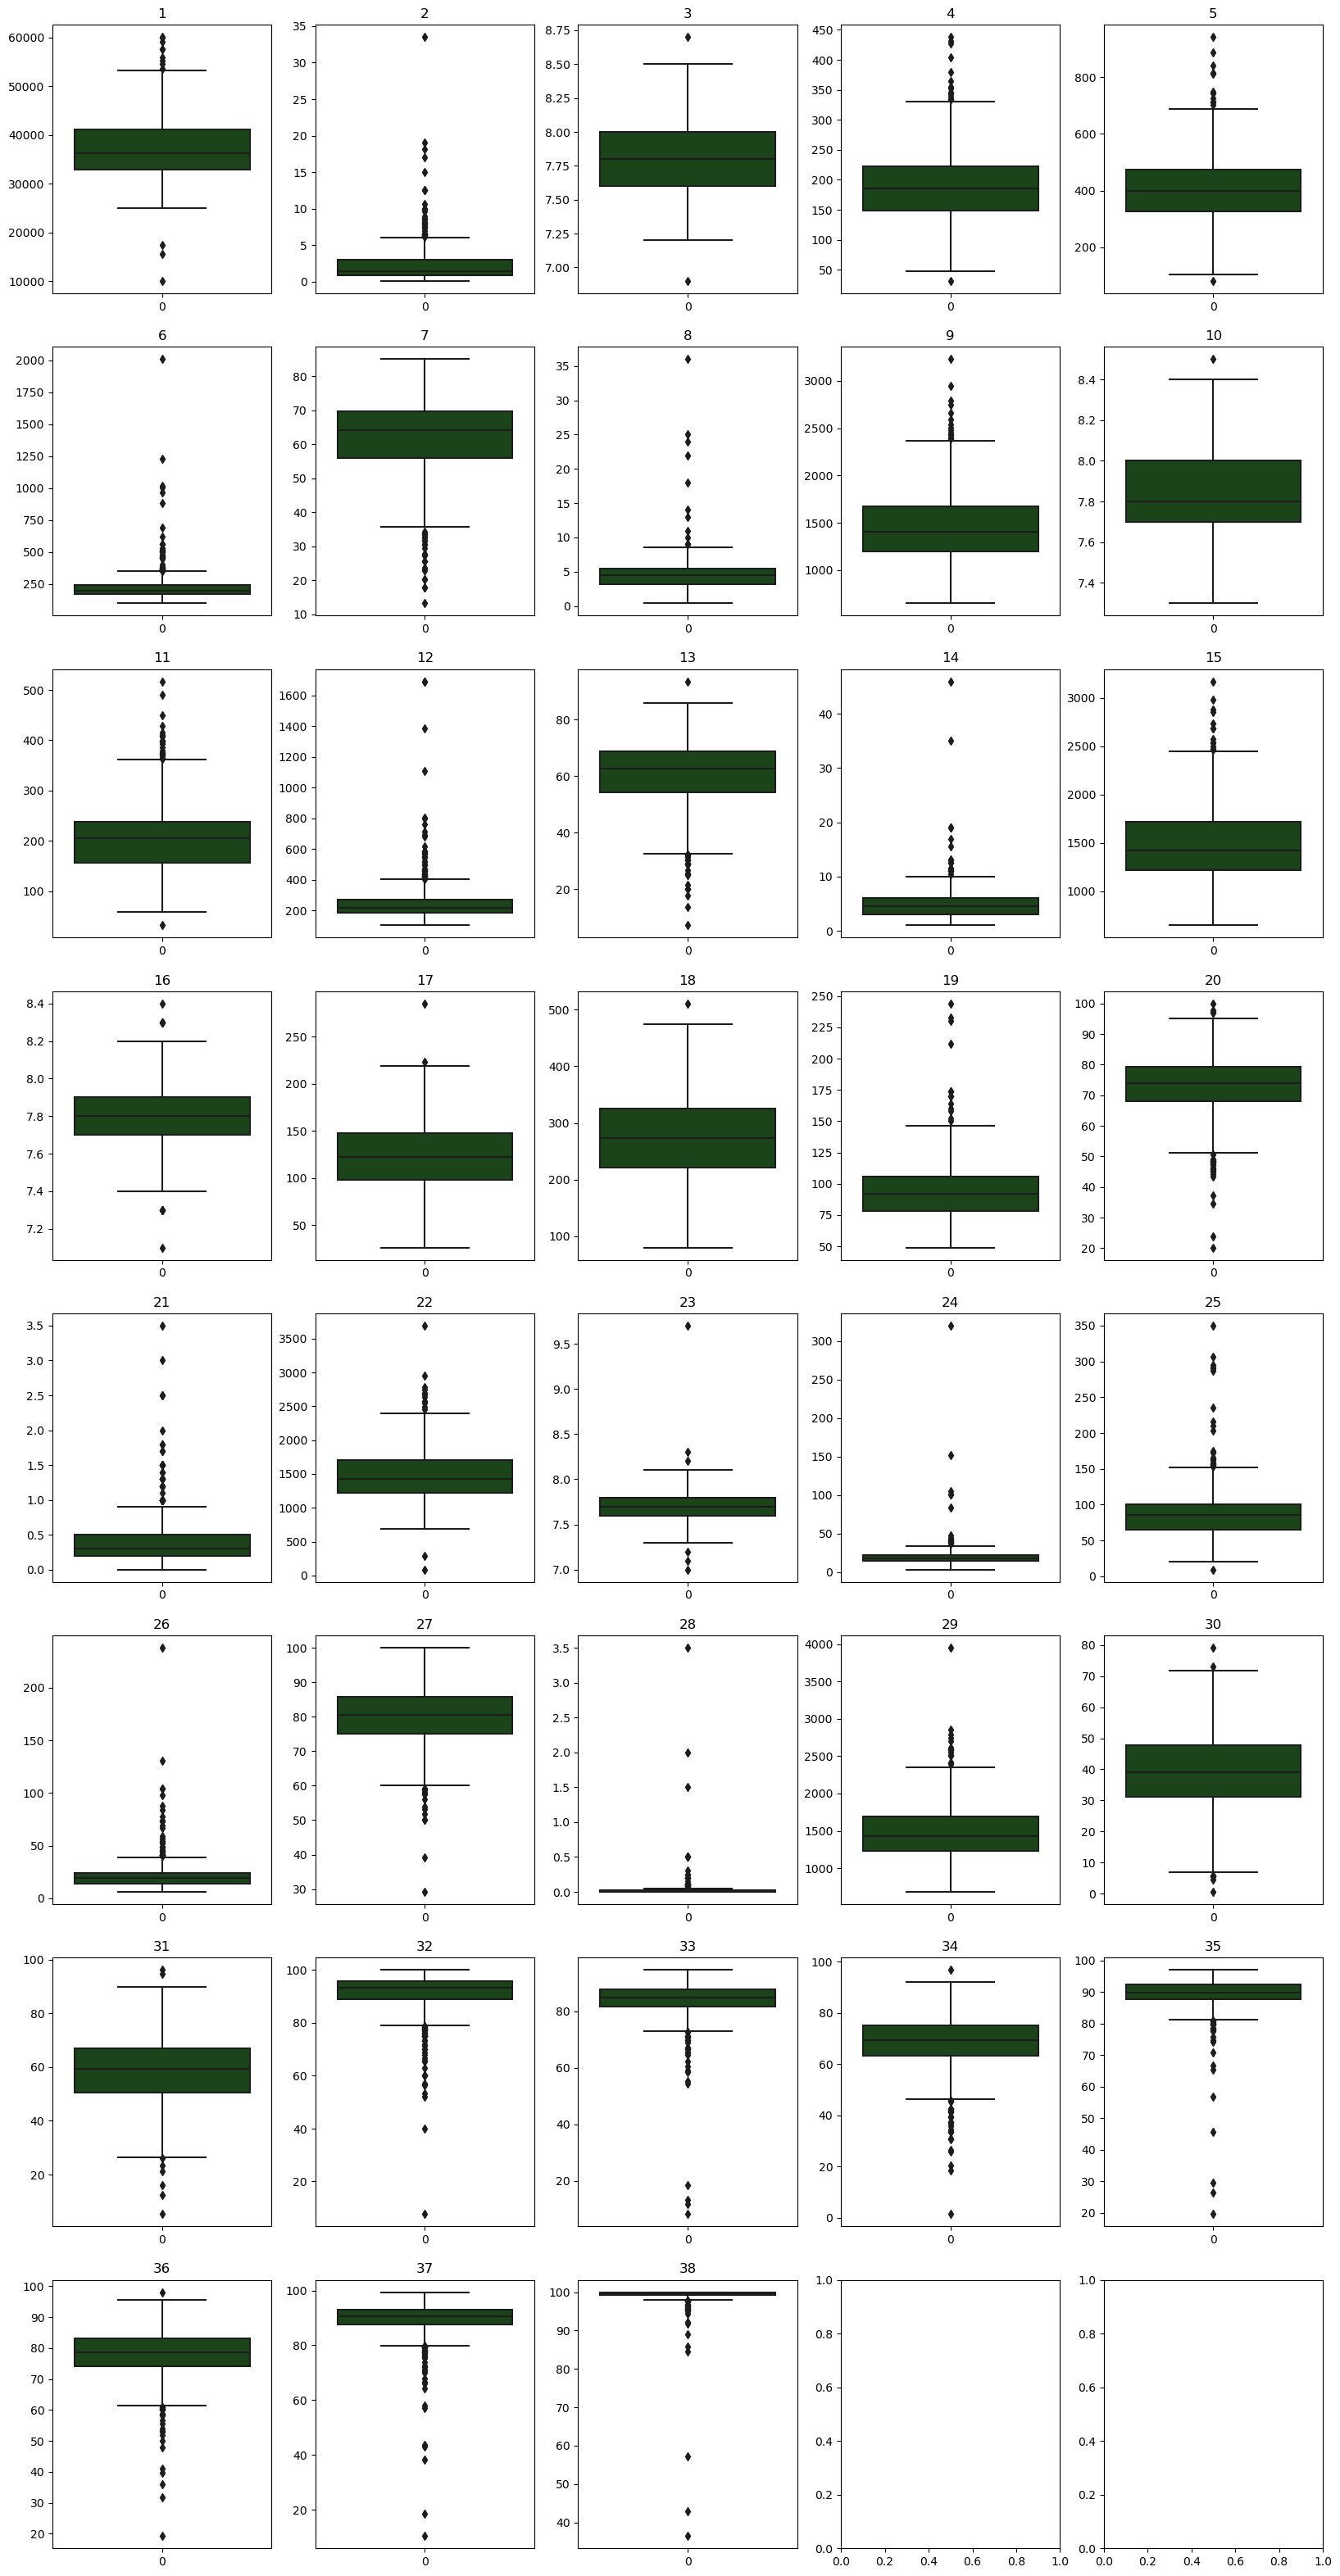

In [44]:
fig  = plt.subplots(nrows = 8,ncols = 5,figsize = (20,40))
for index, column in enumerate(filled_ww_df.columns):
    plt.subplot(8,5,index+1)
    ax = sns.boxplot(filled_ww_df[column], color = distribution_line_color)
    plt.title(column)
plt.show()

In [45]:
# ut = np.triu(filled_ww_df.corr())

# fig = plt.figure(figsize=(12,10))
# sns.heatmap(filled_ww_df.corr(),cmap = 'Greens',annot = True,cbar = 'True',mask = ut);
# plt.title('Correlation Matrix');

#### EDA Insights

    1. Initial function to check null data indicated that the dataset was complete, but manually inspecting it revealed that some records have "?" data. In this study, both imputation and amputation was performed but to shorten the paper, only the imputation was presented. 
    2. Graphs also showed that a lot of features are very skewed, preempting that this dataset will be difficult to analyze due to the data quality. There were also a lot of univariate outliers as seen on the box plots of the data.

### (a) Density-Based Clustering

#### Standardization

In [46]:
ss = StandardScaler()
ss_filled_ww = ss.fit_transform(filled_ww_df)

ss_filled_ww_df = pd.DataFrame(ss_filled_ww, columns=filled_ww_df.columns)
ss_filled_ww_df

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,1.055125,-0.313636,-0.040892,0.000000,0.000851,-0.452858,0.399800,-0.035069,1.600361,0.308849,...,1.304810,0.000000,0.022074,5.682273e-01,1.680795e-15,0.192879,-2.097091e-15,0.178083,-0.204069,0.118922
1,0.275880,0.233999,-0.447493,0.000000,0.301953,-0.099091,0.636089,0.712482,2.994449,-0.573338,...,2.828691,0.000000,0.171191,4.878037e-01,1.680795e-15,1.147272,-2.097091e-15,0.189621,0.384808,0.211520
2,-0.767054,0.964178,-0.854094,0.000000,1.012887,-0.305455,0.693124,-0.446222,0.474952,-0.573338,...,1.015531,0.000000,-0.025015,5.797164e-01,1.680795e-15,-1.318243,-2.097091e-15,-0.237291,-0.032314,-0.135724
3,-0.338215,0.416543,0.365710,0.268594,1.514723,-0.261234,0.342765,-0.035069,2.411467,-0.132244,...,0.891554,-0.431234,0.445881,5.452491e-01,4.555911e-01,0.396129,1.750699e-01,0.512690,0.078101,0.211520
4,-0.046440,-0.313636,0.772311,0.878821,0.745241,-0.379157,0.277581,-0.221957,1.600361,0.308849,...,1.614752,0.000000,0.328157,5.797164e-01,1.680795e-15,0.281249,4.554523e-01,0.039625,-0.179533,0.095772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,-0.691232,-0.802855,-0.447493,-1.578580,-1.295559,-0.379157,-0.374251,-0.857375,-1.481841,-0.573338,...,-1.427844,0.000000,0.296763,3.154674e-01,-1.614229e+00,0.714260,-1.389169e+00,0.085778,0.936880,0.118922
523,-0.566602,-0.744441,-0.040892,0.054190,-0.509349,-0.408637,0.587202,-0.221957,-1.243578,-0.132244,...,-1.407181,0.000000,-0.017167,8.324763e-01,-5.299322e-02,-0.770351,3.078826e-01,-0.375749,0.213052,0.211520
524,-0.660688,-0.751743,-1.667296,-0.819919,-0.333707,-0.349676,0.244990,-0.595733,-1.061080,-1.455524,...,-0.926771,0.000000,0.508667,7.520527e-01,-8.572661e-01,-0.125252,-1.035001e+00,-0.087295,-0.007777,-0.019976
525,-0.773040,-0.751743,-2.073898,0.186131,1.155074,0.225196,0.302025,-0.221957,-0.554139,-1.896618,...,-0.436030,0.051453,0.579301,7.520527e-01,-2.067513e-01,0.272412,7.177115e-02,1.054984,0.065833,0.165221


#### Search for Best Parameters

In [47]:
# Range of values for min_samples and eps
min_samples_range = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
eps_range = [0.1, 0.5, 1, 2, 5, 10]

best_score = -1
best_params = None

In [48]:
for min_samples in min_samples_range:
    for eps in eps_range:
        # Create DBSCAN with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Fit DBSCAN to the data
        cluster_labels = dbscan.fit(ss_filled_ww_df).labels_
        
        # Calculate silhouette score only if there are multiple clusters
        if len(np.unique(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(ss_filled_ww_df, cluster_labels)
            
            # Update best score and parameters if silhouette score is better
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'eps': eps, 'min_samples': min_samples}

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Parameters: {'eps': 10, 'min_samples': 5}
Best Silhouette Score: 0.6304885533472182


In [49]:
best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])

In [50]:
final_cluster_labels = best_dbscan.fit(ss_filled_ww_df).labels_

In [51]:
final_cluster_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [52]:
unique_class, counts = np.unique(final_cluster_labels, return_counts=True)

# Create a dictionary to store the counts
count_dict = dict(zip(unique_class, counts))

# Print the counts
for class_number, count in count_dict.items():
    print(f"Class {class_number} count = {count}")

Class -1 count = 9
Class 0 count = 518


###### Present Anomalies

In [53]:
anomaly_indices = [i for i, x in enumerate(final_cluster_labels) if x == -1]
date_anomalies = waste_water_df.iloc[anomaly_indices][0]

In [54]:
date_anomalies

10     D-13/3/90
11     D-14/3/90
12     D-15/3/90
148    D-29/4/90
395    D-24/5/91
398    D-28/5/91
441    D-17/7/91
442    D-18/7/91
443    D-19/7/91
Name: 0, dtype: object

### (b) Clustering with Reduced Dimension 

#### Search for Best Dimensionality Reduction

In [55]:
def plot_2d(x, title):
    sns.set_style("whitegrid")
    plt.scatter(x[:, 0], x[:, 1], alpha=0.5, lw=1, color=distribution_line_color)
    plt.title(f"{title} of Waste Water 2-Dimensional Data")
    plt.show()
    
    sns.set_style("ticks")

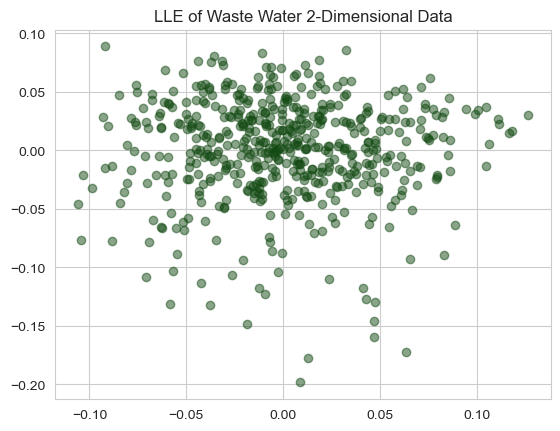

In [56]:
lle_standard = manifold.LocallyLinearEmbedding(n_components = 2, random_state = 0, n_neighbors = 100)
lle_data_x = lle_standard.fit_transform(ss_filled_ww_df)

plot_2d(lle_data_x, 'LLE')

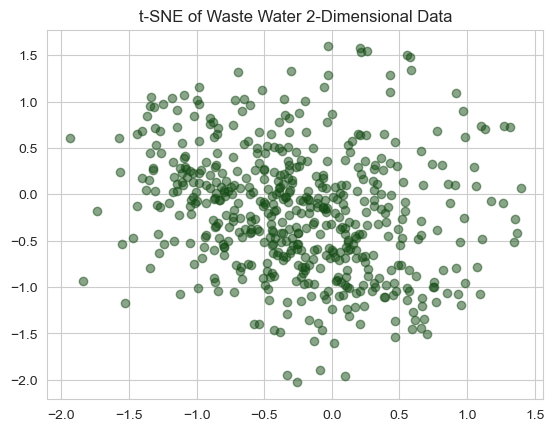

In [57]:
tsne = manifold.TSNE(n_components = 2, random_state = 0, perplexity = 400)
tsne_data_x = tsne.fit_transform(ss_filled_ww_df)

plot_2d(tsne_data_x, 't-SNE')

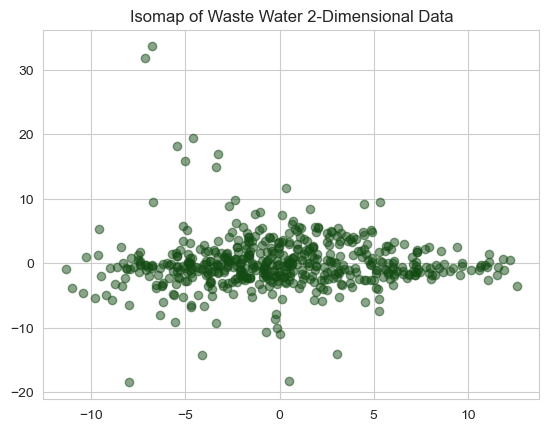

In [58]:
iso = manifold.Isomap(n_components = 2, n_neighbors = 10)
iso_data_x = iso.fit_transform(ss_filled_ww_df)

plot_2d(iso_data_x, 'Isomap')

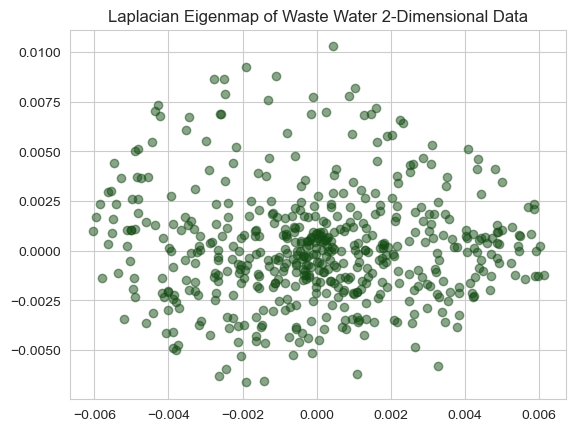

In [59]:
laplacian = manifold.SpectralEmbedding(n_components = 2, n_neighbors = 300)
laplacian_data_x = laplacian.fit_transform(ss_filled_ww_df)

plot_2d(laplacian_data_x, 'Laplacian Eigenmap')

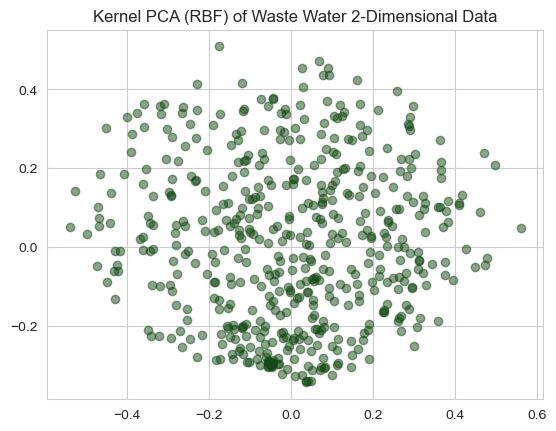

In [60]:
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.05)
kpca_data_x = kpca.fit_transform(ss_filled_ww_df)

plot_2d(kpca_data_x, 'Kernel PCA (RBF)')

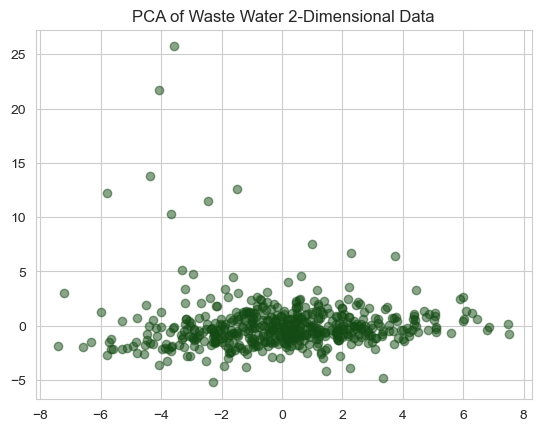

In [61]:
pca = PCA(n_components=2)
pca_data_x = pca.fit_transform(ss_filled_ww_df)

plot_2d(pca_data_x, 'PCA')

###### Test which dimensionality reduced dataset without outliers would yield satisfactory result based on silhouette score

###### (1) Obtained dimensionality reduced dataset.

In [62]:
dataset = {'LLE': lle_data_x, 'T-SNE': tsne_data_x, 'ISO': iso_data_x, 
           'Laplacian': laplacian_data_x, 'KPCA': kpca_data_x, 'PCA': pca_data_x}

###### (2) Perform anomaly detection using default KDE, one-class SVM, and LOF.
###### (3) Get new dataset with normals only.
###### (4) Perform clustering and check best silhouette score with best K.

In [63]:
# parameters
search_max_K = 38
search_step = 1

top_datasets = defaultdict(list)
best_K_values = defaultdict(list)

In [64]:
for name, data in dataset.items():
    # (2) Perform anomaly detection for each model
    # (3) Get normals only
    #m = model, n = normals, an = anomalies
    kde_m, kde_n, kde_an = anomaly_detection(data, KernelDensity(), 'KDE', False)
    ocsvm_m, ocsvm_n, ocsvm_an = anomaly_detection(data, OneClassSVM(), '1C-SVM', False)
    lof_m, lof_n, lof_an = anomaly_detection(data, LocalOutlierFactor(novelty=True), 'LOF', False)
    
    # (4) Search for the best K and best Silhouette Average for each model
    kde_best_K, kde_best_sil = search_best_K(search_max_K, search_step, kde_n, False)
    ocsvm_best_K, ocsvm_best_sil = search_best_K(search_max_K, search_step, ocsvm_n, False)
    lof_best_K, lof_best_sil = search_best_K(search_max_K, search_step, lof_n, False)
    
    print(f'Dimensionality Reduction Model: {name}')
    print(f"KDE - \t \t Best Silhouette Score = {kde_best_sil} | Best K = {kde_best_K}")
    print(f'1C SVM - \t Best Silhouette Score = {ocsvm_best_sil} | Best K = {ocsvm_best_K} ')
    print(f'LOF - \t \t Best Silhouette Score = {lof_best_sil} | Best K = {lof_best_K} ')
    
    # Store the dataset and its silhouette score for each model
    top_datasets['KDE'].append((name, kde_best_sil))
    top_datasets['1C-SVM'].append((name, ocsvm_best_sil))
    top_datasets['LOF'].append((name, lof_best_sil))
    
    # Store the best K for each model
    best_K_values['KDE'].append((name, kde_best_K))
    best_K_values['1C-SVM'].append((name, ocsvm_best_K))
    best_K_values['LOF'].append((name, lof_best_K))

Dimensionality Reduction Model: LLE
KDE - 	 	 Best Silhouette Score = 0.37859530005027137 | Best K = 31
1C SVM - 	 Best Silhouette Score = 0.4155922458833323 | Best K = 25 
LOF - 	 	 Best Silhouette Score = 0.3758918853773078 | Best K = 37 
Dimensionality Reduction Model: T-SNE
KDE - 	 	 Best Silhouette Score = 0.38064149022102356 | Best K = 2
1C SVM - 	 Best Silhouette Score = 0.4371739625930786 | Best K = 2 
LOF - 	 	 Best Silhouette Score = 0.3778690993785858 | Best K = 33 
Dimensionality Reduction Model: ISO
KDE - 	 	 Best Silhouette Score = 0.41605592886560216 | Best K = 2
1C SVM - 	 Best Silhouette Score = 0.44399919675165966 | Best K = 2 
LOF - 	 	 Best Silhouette Score = 0.42225183907922975 | Best K = 2 
Dimensionality Reduction Model: Laplacian
KDE - 	 	 Best Silhouette Score = 0.3776003669741563 | Best K = 6
1C SVM - 	 Best Silhouette Score = 0.40403854008664325 | Best K = 37 
LOF - 	 	 Best Silhouette Score = 0.3716343744864714 | Best K = 33 
Dimensionality Reduction Model: 

In [65]:
# Sort datasets based on the best silhouette score
sorted_datasets = {
    'KDE': sorted(top_datasets['KDE'], key=lambda x: x[1], reverse=True),
    '1C-SVM': sorted(top_datasets['1C-SVM'], key=lambda x: x[1], reverse=True),
    'LOF': sorted(top_datasets['LOF'], key=lambda x: x[1], reverse=True)}

In [66]:
# Get the top dataset and its best K for each model
best_datasets = {
    'KDE': sorted_datasets['KDE'][0][0],
    '1C-SVM': sorted_datasets['1C-SVM'][0][0],
    'LOF': sorted_datasets['LOF'][0][0]}

# Get the 2nd top dataset and its best K for each model
second_best_datasets = {
    'KDE': sorted_datasets['KDE'][1][0],
    '1C-SVM': sorted_datasets['1C-SVM'][1][0],
    'LOF': sorted_datasets['LOF'][1][0]}

In [67]:
# Get the best K values for each model
best_K_data = {model: next(item[1] for item in best_K_values[model] if item[0] == 
                         best_datasets[model]) for model in best_datasets if best_datasets[model]}

# Get the second best K values for each model
second_best_K_data = {model: next(item[1] for item in best_K_values[model] if item[0] == 
                         second_best_datasets[model]) for model in second_best_datasets if second_best_datasets[model]}

In [68]:
for model in sorted_datasets:
    print(f"Top 3 datasets for {model}:")
    for i, (name, sil) in enumerate(sorted_datasets[model][:3]):
        print(f"  {i+1}. {name} - Silhouette Score: {sil}")

Top 3 datasets for KDE:
  1. ISO - Silhouette Score: 0.41605592886560216
  2. KPCA - Silhouette Score: 0.41067796701620246
  3. PCA - Silhouette Score: 0.4004206770113833
Top 3 datasets for 1C-SVM:
  1. KPCA - Silhouette Score: 0.44776560827034856
  2. ISO - Silhouette Score: 0.44399919675165966
  3. T-SNE - Silhouette Score: 0.4371739625930786
Top 3 datasets for LOF:
  1. ISO - Silhouette Score: 0.42225183907922975
  2. KPCA - Silhouette Score: 0.40912644387618974
  3. PCA - Silhouette Score: 0.405623170151685


#### Search for Best Anomaly Detection Model

##### Kernel Density Estimation

###### Best Dataset

In [69]:
# Parameters
i_kernels = ['gaussian', 'epanechnikov', 'exponential', 'linear', 'cosine'] # Removed: 'tophat'
i_bandwith = [0.1, 0.3, 0.5, 0.7, 1.0, 1.5]
          
i_kde_best_kernel = None
i_kde_best_bandwidth = 0
i_kde_best_silhouette_avg = -np.inf

In [70]:
for k in i_kernels:
    for bw in i_bandwith:
        print(f'current kernel: {k} | current bandwith: {bw}')
        i_kde_m, i_kde_n, i_kde_an = anomaly_detection(dataset[best_datasets['KDE']], 
                                                       KernelDensity(kernel=k,bandwidth=bw), 'KDE', False)
        _, _, silhouette_avg = perform_kmeans(best_K_data['KDE'], i_kde_n) 
            
        if silhouette_avg > i_kde_best_silhouette_avg:
            i_kde_best_silhouette_avg = silhouette_avg
            i_kde_best_kernel = k
            i_kde_best_bandwidth = bw

current kernel: gaussian | current bandwith: 0.1
current kernel: gaussian | current bandwith: 0.3
current kernel: gaussian | current bandwith: 0.5
current kernel: gaussian | current bandwith: 0.7
current kernel: gaussian | current bandwith: 1.0
current kernel: gaussian | current bandwith: 1.5
current kernel: epanechnikov | current bandwith: 0.1
current kernel: epanechnikov | current bandwith: 0.3
current kernel: epanechnikov | current bandwith: 0.5
current kernel: epanechnikov | current bandwith: 0.7
current kernel: epanechnikov | current bandwith: 1.0
current kernel: epanechnikov | current bandwith: 1.5
current kernel: exponential | current bandwith: 0.1
current kernel: exponential | current bandwith: 0.3
current kernel: exponential | current bandwith: 0.5
current kernel: exponential | current bandwith: 0.7
current kernel: exponential | current bandwith: 1.0
current kernel: exponential | current bandwith: 1.5
current kernel: linear | current bandwith: 0.1
current kernel: linear | curr

In [71]:
print(f'Best Kernel: {i_kde_best_kernel} | Best Bandwidth: {i_kde_best_bandwidth} | Best Silhouette Average: {i_kde_best_silhouette_avg}')

Best Kernel: linear | Best Bandwidth: 0.1 | Best Silhouette Average: 0.623044155198555


	 Dimensionality Reduction: ISO
	 Threshold (KDE) = 0.18120107372891292


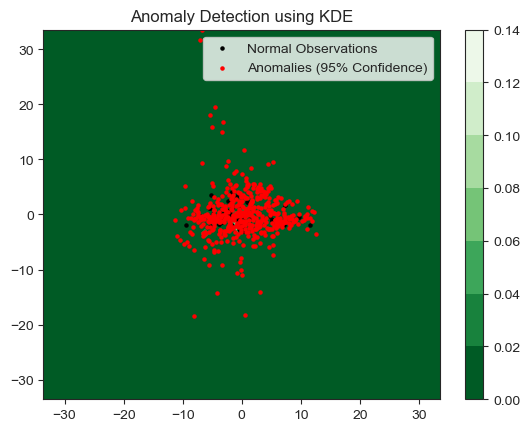

In [72]:
print(f"\t Dimensionality Reduction: {best_datasets['KDE']}")
i_kde_m, i_kde_n, i_kde_an = anomaly_detection(dataset[best_datasets['KDE']], 
                                        KernelDensity(kernel=i_kde_best_kernel,bandwidth=i_kde_best_bandwidth), 'KDE', True)

    - Very poor result
    - Most datapoints were estimated as anomalies which contradicts its very concept
    - Isomapping is not suitable for KDE

###### 2nd Best Dataset

In [73]:
# Parameters
kernels = ['gaussian', 'epanechnikov', 'exponential', 'linear', 'cosine'] # Removed: 'tophat'
bandwith = [0.1, 0.3, 0.5, 0.7, 1.0, 1.5]
          
ii_kde_best_kernel = None
ii_kde_best_bandwidth = 0
ii_kde_best_silhouette_avg = -np.inf

In [74]:
for k in kernels:
    for bw in bandwith:
        print(f'current kernel: {k} | current bandwith: {bw}')
        ii_kde_m, ii_kde_n, ii_kde_an = anomaly_detection(dataset[second_best_datasets['KDE']], 
                                                 KernelDensity(kernel=k,bandwidth=bw), 'KDE', False)
        _, _, silhouette_avg = perform_kmeans(second_best_K_data['KDE'], ii_kde_n) 
            
        if silhouette_avg > ii_kde_best_silhouette_avg:
            ii_kde_best_silhouette_avg = silhouette_avg
            ii_kde_best_kernel = k
            ii_kde_best_bandwidth = bw

current kernel: gaussian | current bandwith: 0.1
current kernel: gaussian | current bandwith: 0.3
current kernel: gaussian | current bandwith: 0.5
current kernel: gaussian | current bandwith: 0.7
current kernel: gaussian | current bandwith: 1.0
current kernel: gaussian | current bandwith: 1.5
current kernel: epanechnikov | current bandwith: 0.1
current kernel: epanechnikov | current bandwith: 0.3
current kernel: epanechnikov | current bandwith: 0.5
current kernel: epanechnikov | current bandwith: 0.7
current kernel: epanechnikov | current bandwith: 1.0
current kernel: epanechnikov | current bandwith: 1.5
current kernel: exponential | current bandwith: 0.1
current kernel: exponential | current bandwith: 0.3
current kernel: exponential | current bandwith: 0.5
current kernel: exponential | current bandwith: 0.7
current kernel: exponential | current bandwith: 1.0
current kernel: exponential | current bandwith: 1.5
current kernel: linear | current bandwith: 0.1
current kernel: linear | curr

In [75]:
print(f'Best Kernel: {ii_kde_best_kernel} | Best Bandwidth: {ii_kde_best_bandwidth} | Best Silhouette Average: {ii_kde_best_silhouette_avg}')

Best Kernel: gaussian | Best Bandwidth: 0.1 | Best Silhouette Average: 0.41795036427818455


	 Dimensionality Reduction: KPCA
	 Threshold (KDE) = 0.561227586894127


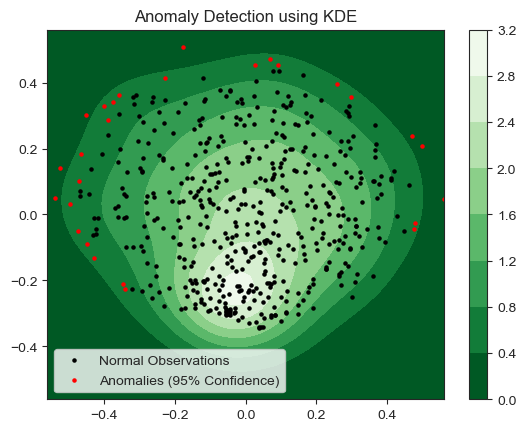

In [76]:
print(f"\t Dimensionality Reduction: {second_best_datasets['KDE']}")
ii_kde_m, ii_kde_n, ii_kde_an = anomaly_detection(dataset[second_best_datasets['KDE']], 
                                         KernelDensity(kernel=ii_kde_best_kernel,bandwidth=ii_kde_best_bandwidth), 'KDE', True)

    - Potentially good result
    - Anomalies identified lie on the upper outer edge of the data which makes sense considering the heavy cluster on the bottom edge, which matches on the scatterplot obtained in section 3.3.1
    - KPCA may be suitable for KDE

###### Manually Selected Dataset: T-SNE

In [77]:
# Parameters
kernels = ['gaussian', 'epanechnikov', 'exponential', 'linear', 'cosine'] # Removed: 'tophat'
bandwith = [0.1, 0.3, 0.5, 0.7, 1.0, 1.5]
          
t_kde_best_kernel = None
t_kde_best_bandwidth = 0
t_kde_best_silhouette_avg = -np.inf

In [78]:
for k in kernels:
    for bw in bandwith:
        print(f'current kernel: {k} | current bandwith: {bw}')
        t_kde_m, t_kde_n, t_kde_an = anomaly_detection(dataset['T-SNE'], 
                                                 KernelDensity(kernel=k,bandwidth=bw), 'KDE', False)
        _, _, silhouette_avg = perform_kmeans(2, t_kde_n) # Best K for T-SNE for KDE
            
        if silhouette_avg > t_kde_best_silhouette_avg:
            t_kde_best_silhouette_avg = silhouette_avg
            t_kde_best_kernel = k
            t_kde_best_bandwidth = bw

current kernel: gaussian | current bandwith: 0.1
current kernel: gaussian | current bandwith: 0.3
current kernel: gaussian | current bandwith: 0.5
current kernel: gaussian | current bandwith: 0.7
current kernel: gaussian | current bandwith: 1.0
current kernel: gaussian | current bandwith: 1.5
current kernel: epanechnikov | current bandwith: 0.1
current kernel: epanechnikov | current bandwith: 0.3
current kernel: epanechnikov | current bandwith: 0.5
current kernel: epanechnikov | current bandwith: 0.7
current kernel: epanechnikov | current bandwith: 1.0
current kernel: epanechnikov | current bandwith: 1.5
current kernel: exponential | current bandwith: 0.1
current kernel: exponential | current bandwith: 0.3
current kernel: exponential | current bandwith: 0.5
current kernel: exponential | current bandwith: 0.7
current kernel: exponential | current bandwith: 1.0
current kernel: exponential | current bandwith: 1.5
current kernel: linear | current bandwith: 0.1
current kernel: linear | curr

In [79]:
print(f'Best Kernel: {t_kde_best_kernel} | Best Bandwidth: {t_kde_best_bandwidth} | Best Silhouette Average: {t_kde_best_silhouette_avg}')

Best Kernel: exponential | Best Bandwidth: 0.3 | Best Silhouette Average: 0.38271191716194153


	 Dimensionality Reduction: T-SNE
	 Threshold (KDE) = 0.03794416201395369


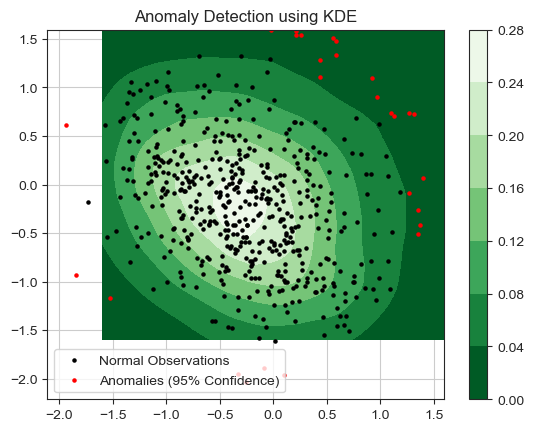

In [80]:
print(f"\t Dimensionality Reduction: {'T-SNE'}")
t_kde_m, t_kde_n, t_kde_an = anomaly_detection(dataset['T-SNE'], 
                                         KernelDensity(kernel=t_kde_best_kernel,bandwidth=t_kde_best_bandwidth), 'KDE', True)

    - Potentially good result
    - Most anomalies lie on the extreme positive PC1-PC2 and extreme negative PC1-PC2
    - T-SNE may be a suitable dimensionality reduction for the dataset

###### Get the samples corresponding to normals and anomalies

In [81]:
def get_dates(dataset, classed_data, df):
    # Check for samples which correspond to normals
    indices = [i for i, x in enumerate(dataset) if np.isin(x, classed_data).any()]

    # Use the indices to map back to the original DataFrame and extract the sample labels
    classed_data_dates = df.iloc[indices, 0]
    
    return classed_data_dates

In [82]:
# Best Dataset
i_normals_kde = get_dates(dataset[best_datasets['KDE']], i_kde_n, waste_water_df)
i_anomalies_kde = get_dates(dataset[best_datasets['KDE']], i_kde_an, waste_water_df)

In [83]:
# Second Best Dataset
ii_normals_kde = get_dates(dataset[second_best_datasets['KDE']], ii_kde_n, waste_water_df)
ii_anomalies_kde = get_dates(dataset[second_best_datasets['KDE']], ii_kde_an, waste_water_df)

In [84]:
# Best Dataset
t_normals_kde = get_dates(dataset['T-SNE'], t_kde_n, waste_water_df)
t_anomalies_kde = get_dates(dataset['T-SNE'], t_kde_an, waste_water_df)

##### One-Class SVM

###### Best Dataset

In [85]:
# Parameters
nu_s = [0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
gamma = [1, 0.1, 0.01, 'auto', 'scale']
          
i_ocsvm_best_nu = None
i_ocsvm_best_gamma = None
i_ocsvm_best_silhouette_avg = -np.inf

In [86]:
for n in nu_s:
    for g in gamma:
        print(f'current nu: {n} | current gamma: {g}')
        i_ocsvm_m, i_ocsvm_n, i_ocsvm_an = anomaly_detection(dataset[best_datasets['1C-SVM']], 
                                                       OneClassSVM(nu=n, gamma=g), 'One-Class SVM', False)
        _, _, silhouette_avg = perform_kmeans(best_K_data['1C-SVM'], ocsvm_n)
            
        if silhouette_avg > i_ocsvm_best_silhouette_avg:
            i_ocsvm_best_silhouette_avg = silhouette_avg
            i_ocsvm_best_nu = n
            i_ocsvm_best_gamma = g

current nu: 0.05 | current gamma: 1
current nu: 0.05 | current gamma: 0.1
current nu: 0.05 | current gamma: 0.01
current nu: 0.05 | current gamma: auto
current nu: 0.05 | current gamma: scale
current nu: 0.1 | current gamma: 1
current nu: 0.1 | current gamma: 0.1
current nu: 0.1 | current gamma: 0.01
current nu: 0.1 | current gamma: auto
current nu: 0.1 | current gamma: scale
current nu: 0.3 | current gamma: 1
current nu: 0.3 | current gamma: 0.1
current nu: 0.3 | current gamma: 0.01
current nu: 0.3 | current gamma: auto
current nu: 0.3 | current gamma: scale
current nu: 0.5 | current gamma: 1
current nu: 0.5 | current gamma: 0.1
current nu: 0.5 | current gamma: 0.01
current nu: 0.5 | current gamma: auto
current nu: 0.5 | current gamma: scale
current nu: 0.7 | current gamma: 1
current nu: 0.7 | current gamma: 0.1
current nu: 0.7 | current gamma: 0.01
current nu: 0.7 | current gamma: auto
current nu: 0.7 | current gamma: scale
current nu: 0.9 | current gamma: 1
current nu: 0.9 | current

In [87]:
print(f'Best Nu: {i_ocsvm_best_nu} | Best Gamma: {i_ocsvm_best_gamma} | Best Silhouette Average: {i_ocsvm_best_silhouette_avg}')

Best Nu: 0.05 | Best Gamma: 1 | Best Silhouette Average: 0.37885295408913705


	 Dimensionality Reduction: KPCA


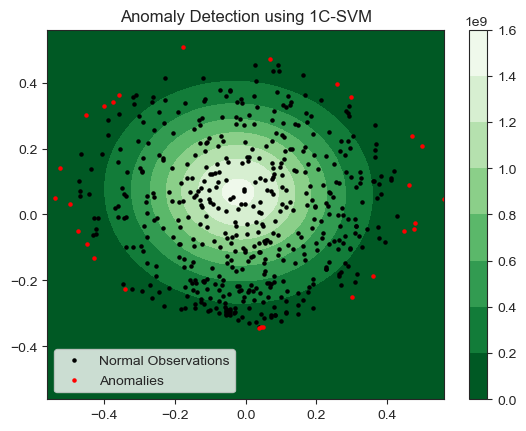

In [88]:
print(f"\t Dimensionality Reduction: {best_datasets['1C-SVM']}")
i_ocsvm_m, i_ocsvm_n, i_ocsvm_an = anomaly_detection(dataset[best_datasets['1C-SVM']], 
                                               OneClassSVM(nu=i_ocsvm_best_nu, gamma=i_ocsvm_best_gamma), '1C-SVM', True)

    - Potentially good result
    - Most anomalies lie on the edges surrounding the data
    - KPCA may be a suitable dimensionality reduction for the dataset

###### Second Best Dataset

In [89]:
# Parameters
nu_s = [0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
gamma = [1, 0.1, 0.01, 'auto', 'scale']
          
ii_ocsvm_best_nu = None
ii_ocsvm_best_gamma = None
ii_ocsvm_best_silhouette_avg = -np.inf

In [90]:
for n in nu_s:
    for g in gamma:
        print(f'current nu: {n} | current gamma: {g}')
        ii_ocsvm_m, ii_ocsvm_n, ii_ocsvm_an = anomaly_detection(dataset[second_best_datasets['1C-SVM']], 
                                                       OneClassSVM(nu=n, gamma=g), 'One-Class SVM', False)
        _, _, silhouette_avg = perform_kmeans(second_best_K_data['1C-SVM'], ii_ocsvm_n)
            
        if silhouette_avg > ii_ocsvm_best_silhouette_avg:
            ii_ocsvm_best_silhouette_avg = silhouette_avg
            ii_ocsvm_best_nu = n
            ii_ocsvm_best_gamma = g

current nu: 0.05 | current gamma: 1
current nu: 0.05 | current gamma: 0.1
current nu: 0.05 | current gamma: 0.01
current nu: 0.05 | current gamma: auto
current nu: 0.05 | current gamma: scale
current nu: 0.1 | current gamma: 1
current nu: 0.1 | current gamma: 0.1
current nu: 0.1 | current gamma: 0.01
current nu: 0.1 | current gamma: auto
current nu: 0.1 | current gamma: scale
current nu: 0.3 | current gamma: 1
current nu: 0.3 | current gamma: 0.1
current nu: 0.3 | current gamma: 0.01
current nu: 0.3 | current gamma: auto
current nu: 0.3 | current gamma: scale
current nu: 0.5 | current gamma: 1
current nu: 0.5 | current gamma: 0.1
current nu: 0.5 | current gamma: 0.01
current nu: 0.5 | current gamma: auto
current nu: 0.5 | current gamma: scale
current nu: 0.7 | current gamma: 1
current nu: 0.7 | current gamma: 0.1
current nu: 0.7 | current gamma: 0.01
current nu: 0.7 | current gamma: auto
current nu: 0.7 | current gamma: scale
current nu: 0.9 | current gamma: 1
current nu: 0.9 | current

In [91]:
print(f'Best Nu: {ii_ocsvm_best_nu} | Best Gamma: {ii_ocsvm_best_gamma} | Best Silhouette Average: {ii_ocsvm_best_silhouette_avg}')

Best Nu: 0.9 | Best Gamma: 1 | Best Silhouette Average: 0.7079475163120178


	 Dimensionality Reduction: ISO


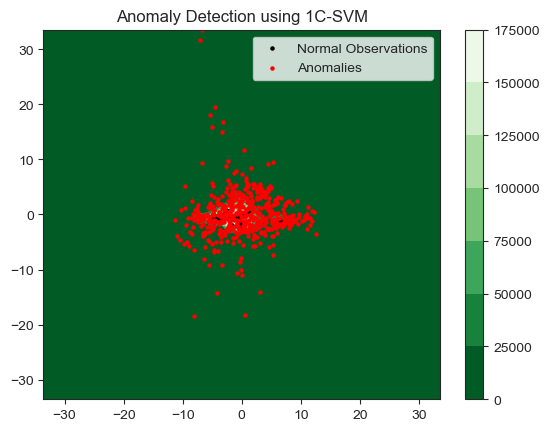

In [92]:
print(f"\t Dimensionality Reduction: {second_best_datasets['1C-SVM']}")
ii_ocsvm_m, ii_ocsvm_n, ii_ocsvm_an = anomaly_detection(dataset[second_best_datasets['1C-SVM']], 
                                               OneClassSVM(nu=ii_ocsvm_best_nu, gamma=ii_ocsvm_best_gamma), '1C-SVM', True)

    - Very poor result
    - Similarly in KDE, most of the data were recorded as anomalies
    - Isomapping may not be suitable dimensionality reduction for the dataset

###### Manually Selected Dataset: T-SNE

In [93]:
# Parameters
nu_s = [0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
gamma = [1, 0.1, 0.01, 'auto', 'scale']
          
t_ocsvm_best_nu = None
t_ocsvm_best_gamma = None
t_ocsvm_best_silhouette_avg = -np.inf

In [94]:
for n in nu_s:
    for g in gamma:
        print(f'current nu: {n} | current gamma: {g}')
        t_ocsvm_m, t_ocsvm_n, t_ocsvm_an = anomaly_detection(dataset['T-SNE'], 
                                                       OneClassSVM(nu=n, gamma=g), 'One-Class SVM', False)
        _, _, silhouette_avg = perform_kmeans(2, t_ocsvm_n)
            
        if silhouette_avg > t_ocsvm_best_silhouette_avg:
            t_ocsvm_best_silhouette_avg = silhouette_avg
            t_ocsvm_best_nu = n
            t_ocsvm_best_gamma = g

current nu: 0.05 | current gamma: 1
current nu: 0.05 | current gamma: 0.1
current nu: 0.05 | current gamma: 0.01
current nu: 0.05 | current gamma: auto
current nu: 0.05 | current gamma: scale
current nu: 0.1 | current gamma: 1
current nu: 0.1 | current gamma: 0.1
current nu: 0.1 | current gamma: 0.01
current nu: 0.1 | current gamma: auto
current nu: 0.1 | current gamma: scale
current nu: 0.3 | current gamma: 1
current nu: 0.3 | current gamma: 0.1
current nu: 0.3 | current gamma: 0.01
current nu: 0.3 | current gamma: auto
current nu: 0.3 | current gamma: scale
current nu: 0.5 | current gamma: 1
current nu: 0.5 | current gamma: 0.1
current nu: 0.5 | current gamma: 0.01
current nu: 0.5 | current gamma: auto
current nu: 0.5 | current gamma: scale
current nu: 0.7 | current gamma: 1
current nu: 0.7 | current gamma: 0.1
current nu: 0.7 | current gamma: 0.01
current nu: 0.7 | current gamma: auto
current nu: 0.7 | current gamma: scale
current nu: 0.9 | current gamma: 1
current nu: 0.9 | current

In [95]:
print(f'Best Nu: {t_ocsvm_best_nu} | Best Gamma: {t_ocsvm_best_gamma} | Best Silhouette Average: {t_ocsvm_best_silhouette_avg}')

Best Nu: 0.5 | Best Gamma: scale | Best Silhouette Average: 0.4371739625930786


	 Dimensionality Reduction: T-SNE


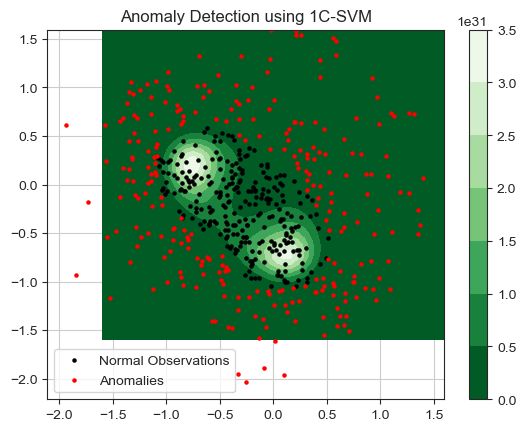

In [96]:
print(f"\t Dimensionality Reduction: {'T-SNE'}")
t_ocsvm_m, t_ocsvm_n, t_ocsvm_an = anomaly_detection(dataset['T-SNE'], 
                                               OneClassSVM(nu=t_ocsvm_best_nu, gamma=t_ocsvm_best_gamma), '1C-SVM', True)

    - Bad result
    - The graph tried to follow the points in a barbell-shape pattern and even though outliers lie on the outer zone, almost half of the datapoints were still considered as anomaly
    - T-SNE may be a suitable dimensionality reduction when one-class SVM is used for this dataset as it tend to consider a lot of outside datapoints as novelties.

###### Get the samples corresponding to normals and anomalies

In [97]:
i_normals_ocsvm = get_dates(dataset[best_datasets['1C-SVM']], i_ocsvm_n, waste_water_df)
i_anomalies_ocsvm = get_dates(dataset[best_datasets['1C-SVM']], i_ocsvm_an, waste_water_df)

In [98]:
ii_normals_ocsvm = get_dates(dataset[second_best_datasets['1C-SVM']], ii_ocsvm_n, waste_water_df)
ii_anomalies_ocsvm = get_dates(dataset[second_best_datasets['1C-SVM']], ii_ocsvm_an, waste_water_df)

In [99]:
t_normals_ocsvm = get_dates(dataset['T-SNE'], t_ocsvm_n, waste_water_df)
t_anomalies_ocsvm = get_dates(dataset['T-SNE'], t_ocsvm_an, waste_water_df)

##### Local Outlier Factor

###### Best Dataset

In [100]:
# Parameters
neighbors = [2, 4, 5, 10, 19, 20, 38, 76, 95, 190, 380]

i_lof_best_neighbor = None
i_lof_best_silhouette_avg = -np.inf

In [101]:
for n in neighbors:
    print(f'current n_neighbor: {n}')
    i_lof_m, i_lof_n, i_lof_an = anomaly_detection(dataset[best_datasets['LOF']], 
                                                   LocalOutlierFactor(n_neighbors=n,novelty=True), 'LOF', False)
    _, _, silhouette_avg = perform_kmeans(best_K_data['LOF'], i_ocsvm_n) 

    if silhouette_avg > i_lof_best_silhouette_avg:
        i_lof_best_silhouette_avg = silhouette_avg
        i_lof_best_neighbor = n

current n_neighbor: 2
current n_neighbor: 4
current n_neighbor: 5
current n_neighbor: 10
current n_neighbor: 19
current n_neighbor: 20
current n_neighbor: 38
current n_neighbor: 76
current n_neighbor: 95
current n_neighbor: 190
current n_neighbor: 380


In [102]:
print(f'Best Number of Neighbors: {i_lof_best_neighbor} | Best Silhouette Average: {i_lof_best_silhouette_avg}')

Best Number of Neighbors: 2 | Best Silhouette Average: 0.3618740582316143


	 Dimensionality Reduction: ISO


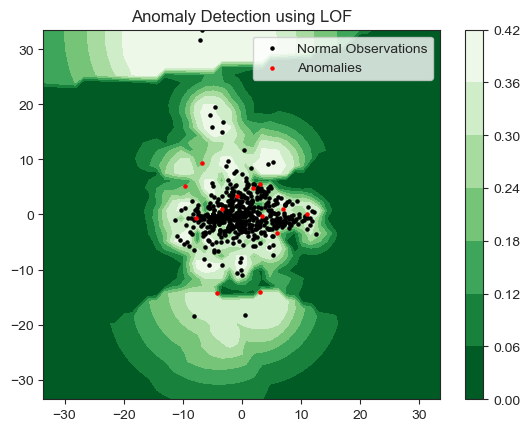

In [103]:
print(f"\t Dimensionality Reduction: {best_datasets['LOF']}")
i_lof_m, i_lof_n, i_lof_an = anomaly_detection(dataset[best_datasets['LOF']], 
                                               LocalOutlierFactor(n_neighbors=i_lof_best_neighbor,novelty=True), 'LOF', True)

    - Kind of weird result
    - Anomalies were mixed within the dataset and some points were on the extreme values of component in the y-axis but was still tagged as normal

###### Second Best Dataset

In [104]:
# Parameters
neighbors = [2, 4, 5, 10, 19, 20, 38, 76, 95, 190, 380]

ii_lof_best_neighbor = None
ii_lof_best_silhouette_avg = -np.inf

In [105]:
for n in neighbors:
    print(f'current n_neighbor: {n}')
    ii_lof_m, ii_lof_n, ii_lof_an = anomaly_detection(dataset[second_best_datasets['LOF']], 
                                                   LocalOutlierFactor(n_neighbors=n,novelty=True), 'LOF', False)
    _, _, silhouette_avg = perform_kmeans(second_best_K_data['LOF'], ii_ocsvm_n) 

    if silhouette_avg > ii_lof_best_silhouette_avg:
        ii_lof_best_silhouette_avg = silhouette_avg
        ii_lof_best_neighbor = n

current n_neighbor: 2
current n_neighbor: 4
current n_neighbor: 5
current n_neighbor: 10
current n_neighbor: 19
current n_neighbor: 20
current n_neighbor: 38
current n_neighbor: 76
current n_neighbor: 95
current n_neighbor: 190
current n_neighbor: 380


In [106]:
print(f'Best Number of Neighbors: {ii_lof_best_neighbor} | Best Silhouette Average: {ii_lof_best_silhouette_avg}')

Best Number of Neighbors: 2 | Best Silhouette Average: 0.25881325748046435


	 Dimensionality Reduction: KPCA


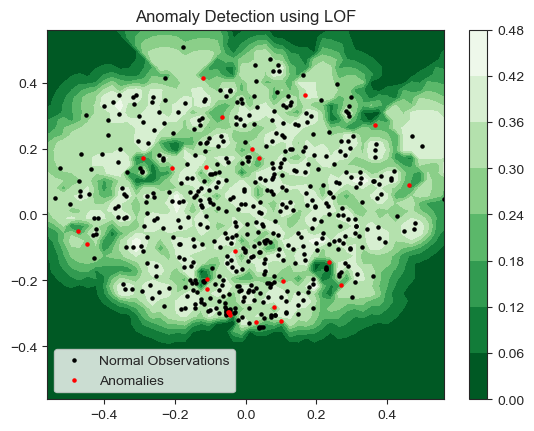

In [107]:
print(f"\t Dimensionality Reduction: {second_best_datasets['LOF']}")
ii_lof_m, ii_lof_n, ii_lof_an = anomaly_detection(dataset[second_best_datasets['LOF']], 
                                               LocalOutlierFactor(n_neighbors=ii_lof_best_neighbor,novelty=True), 'LOF', True)

    - Kind of good result
    - The graph continued to follow the plot 
    - Some datapoints seemed to have no nearby neighbor but was not tagged as outlier

###### Manually Selected Dataset: T-SNE

In [108]:
# Parameters
neighbors = [2, 4, 5, 10, 19, 20, 38, 76, 95, 190, 380]

t_lof_best_neighbor = None
t_lof_best_silhouette_avg = -np.inf

In [109]:
for n in neighbors:
    print(f'current n_neighbor: {n}')
    t_lof_m, t_lof_n, t_lof_an = anomaly_detection(dataset['T-SNE'], 
                                                   LocalOutlierFactor(n_neighbors=n,novelty=True), 'LOF', False)
    _, _, silhouette_avg = perform_kmeans(33, ii_ocsvm_n) 

    if silhouette_avg > t_lof_best_silhouette_avg:
        t_lof_best_silhouette_avg = silhouette_avg
        t_lof_best_neighbor = n

current n_neighbor: 2
current n_neighbor: 4
current n_neighbor: 5
current n_neighbor: 10
current n_neighbor: 19
current n_neighbor: 20
current n_neighbor: 38
current n_neighbor: 76
current n_neighbor: 95
current n_neighbor: 190
current n_neighbor: 380


In [110]:
print(f'Best Number of Neighbors: {t_lof_best_neighbor} | Best Silhouette Average: {t_lof_best_silhouette_avg}')

Best Number of Neighbors: 2 | Best Silhouette Average: 0.3356974289480465


	 Dimensionality Reduction: T-SNE


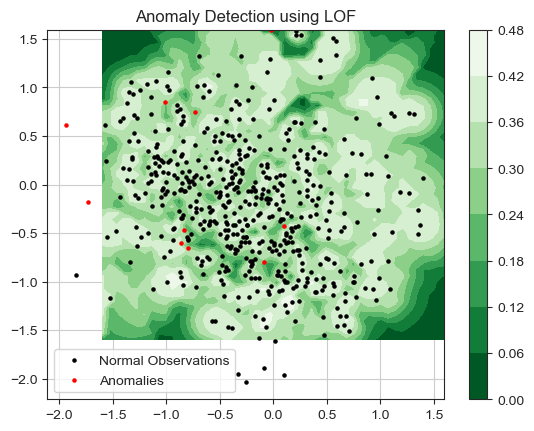

In [111]:
print(f"\t Dimensionality Reduction: {'T-SNE'}")
t_lof_m, t_lof_n, t_lof_an = anomaly_detection(dataset['T-SNE'], 
                                               LocalOutlierFactor(n_neighbors=t_lof_best_neighbor,novelty=True), 'LOF', True)

    - Kind of good result also
    - Similary, the graph continued to follow the plot 
    - Some datapoints also seemed to have no nearby neighbor but was not tagged as outlier

###### Get the samples corresponding to normals and anomalies

In [112]:
i_normals_lof = get_dates(dataset[best_datasets['LOF']], i_lof_n, waste_water_df)
i_anomalies_lof = get_dates(dataset[best_datasets['LOF']], i_lof_an, waste_water_df)

In [113]:
ii_normals_lof = get_dates(dataset[second_best_datasets['LOF']], ii_lof_n, waste_water_df)
ii_anomalies_lof = get_dates(dataset[second_best_datasets['LOF']], ii_lof_an, waste_water_df)

In [114]:
t_normals_lof = get_dates(dataset['T-SNE'], t_lof_n, waste_water_df)
t_anomalies_lof = get_dates(dataset['T-SNE'], t_lof_an, waste_water_df)

### Dataset Source - Label Comparison
    - Using the actual event during the record date, we could check the accuracy of the anomaly detection methods performed
    - Dataset are classed into two major classification, "normal" for normal situation days of the plant, and "anomaly" for days with problems occuring in or natural calamities affecting the treatment plant.

#### Dataset

##### Import

In [115]:
normal_days = r"C:\Users\Josh\000 Files\003 Mengg AI\01b 221 (AI)\01 Machine Exercises\06 Clustering\normal.csv"
normal_days_df = import_csv_dataset(normal_days, 0)

In [116]:
normal_days_range = r"C:\Users\Josh\000 Files\003 Mengg AI\01b 221 (AI)\01 Machine Exercises\06 Clustering\normal_range.csv"
normal_days_range_df = import_csv_dataset(normal_days_range, 0)

In [117]:
anomaly_days = r"C:\Users\Josh\000 Files\003 Mengg AI\01b 221 (AI)\01 Machine Exercises\06 Clustering\anomaly.csv"
anomaly_days_df = import_csv_dataset(anomaly_days, 0)

#### Preparation

###### Since some data from the source contain ranges for some dates, expansion will be necessary

In [118]:
def expand_date_range(date_range):
    start_date_str, end_date_str = date_range.split(' to ')
    start_date = datetime.strptime(start_date_str, 'D-%d/%m/%y')
    end_date = datetime.strptime(end_date_str, 'D-%d/%m/%y')
    expanded_dates = []
    current_date = start_date
    while current_date <= end_date:
        expanded_dates.append(current_date.strftime('D-%d/%m/%y'))
        current_date += timedelta(days=1)
    return expanded_dates

In [119]:
expanded_data = []
for index, row in normal_days_range_df.iterrows():
    dates = expand_date_range(row['date'])
    for date in dates:
        expanded_data.append({'date': date, 'class': row['class']})

expanded_normal_days_df = pd.DataFrame(expanded_data)

###### Combine the dataframes

In [120]:
# Add label column to expanded_normal_days_df and normal_days_df
expanded_normal_days_df['label'] = 'normal'
normal_days_df['label'] = 'normal'

# Add label column to anomaly_days_df
anomaly_days_df['label'] = 'anomaly'

# Combine the three DataFrames
label_df = pd.concat([expanded_normal_days_df, normal_days_df, anomaly_days_df], ignore_index=True)

#### Testing

In [121]:
labels = ['anomaly', 'normal']

##### Kernel Density Estimation

###### Best Dataset

In [122]:
def combine_df(normals, anomalies):
    # Create a DataFrame from normals_kde and anomalies_kde obtained from section 3.3.2
    df_normals = pd.DataFrame({'date': normals.values, 'prediction': 'normal'})
    df_anomalies = pd.DataFrame({'date': anomalies.values, 'prediction': 'anomaly'})

    df = pd.concat([df_normals, df_anomalies])
    df.reset_index(drop=True, inplace=True)
    
    # Add the 'prediction' column and input values based on the prediction of model
#     df['prediction'] = 'normal'
#     df.loc[df['date'].isin(anomalies_kde.index), 'prediction'] = 'anomaly'

    # Sort the DataFrame by date if needed
    df = df.sort_values('date').reset_index(drop=True)
    
    return df

In [123]:
i_kde_initial_final_df = combine_df(i_normals_kde, i_anomalies_kde)

In [124]:
def add_actual_labels(df_prediction, df_actual):
    
    # Create copies of the DataFrames
    df_prediction_copy = df_prediction.copy()
    df_actual_copy = df_actual.copy()
    
    # Adjust formatting of values
    df_prediction_copy['actual'] = ''
    df_prediction_copy['date'] = pd.to_datetime(df_prediction_copy['date'].astype(str).str.split('-', expand=True)[1], format='%d/%m/%y')
    df_actual_copy['date'] = pd.to_datetime(df_actual_copy['date'].astype(str).str.split('-', expand=True)[1], format='%d/%m/%y')
    
    y_pred = df_prediction_copy['prediction'].tolist()
    y_actual = []
    
    # Check if the "date" values in kde_final_df are in combined_df
    for index, row in df_prediction_copy.iterrows():
        if row['date'] in df_actual_copy['date'].values:
            combined_row = df_actual_copy[df_actual_copy['date'] == row['date']].iloc[0]
            df_prediction_copy.at[index, 'actual'] = combined_row['label']
            y_actual.append(combined_row['label'])
        else:
            print(f"Value not found at index {index} - {row['date']}")
            
    return df_prediction_copy, y_pred, y_actual

In [125]:
i_kde_final_df, i_kde_pred, i_kde_actual = add_actual_labels(i_kde_initial_final_df, label_df)

In [126]:
def create_confusion_matrix_and_report(y_prediction, y, labels):
    labels = [str(label) for label in labels]
    
    conf_matrix = confusion_matrix(y, y_prediction)
    conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = labels)
    conf_matrix_display.plot(cmap='Greens')

    plt.title('Confusion Matrix')
    plt.show()

    report = classification_report(y, y_prediction, target_names=labels)
    print(report)

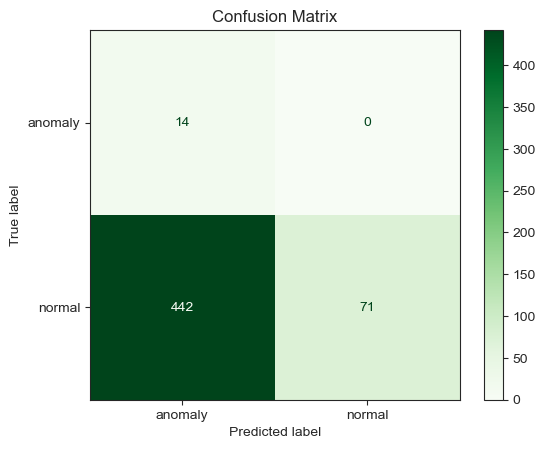

              precision    recall  f1-score   support

     anomaly       0.03      1.00      0.06        14
      normal       1.00      0.14      0.24       513

    accuracy                           0.16       527
   macro avg       0.52      0.57      0.15       527
weighted avg       0.97      0.16      0.24       527



In [127]:
create_confusion_matrix_and_report(i_kde_pred, i_kde_actual, labels)

###### Second Best Data

In [128]:
ii_kde_initial_final_df = combine_df(ii_normals_kde, ii_anomalies_kde)

In [129]:
ii_kde_final_df, ii_kde_pred, ii_kde_actual = add_actual_labels(ii_kde_initial_final_df, label_df)

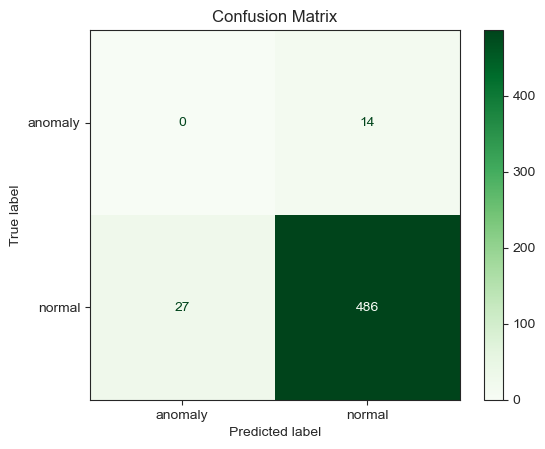

              precision    recall  f1-score   support

     anomaly       0.00      0.00      0.00        14
      normal       0.97      0.95      0.96       513

    accuracy                           0.92       527
   macro avg       0.49      0.47      0.48       527
weighted avg       0.95      0.92      0.93       527



In [130]:
create_confusion_matrix_and_report(ii_kde_pred, ii_kde_actual, labels)

###### Manual Data: T-SNE

In [131]:
t_kde_initial_final_df = combine_df(t_normals_kde, t_anomalies_kde)

In [132]:
t_kde_final_df, t_kde_pred, t_kde_actual = add_actual_labels(t_kde_initial_final_df, label_df)

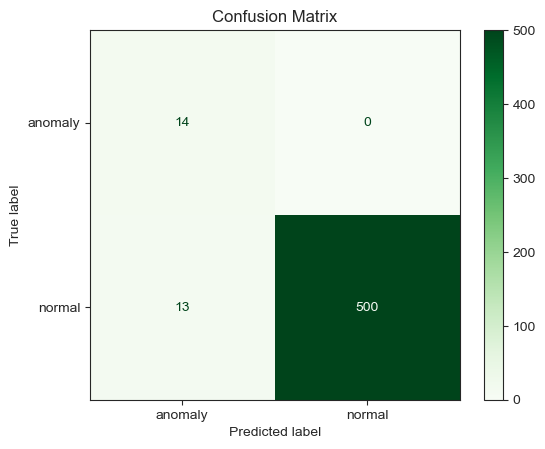

              precision    recall  f1-score   support

     anomaly       0.52      1.00      0.68        14
      normal       1.00      0.97      0.99       513

    accuracy                           0.98       527
   macro avg       0.76      0.99      0.84       527
weighted avg       0.99      0.98      0.98       527



In [133]:
create_confusion_matrix_and_report(t_kde_pred, t_kde_actual, labels)

##### One-Class SVM

###### Best Data

In [134]:
i_ocsvm_initial_final_df = combine_df(i_normals_ocsvm, i_anomalies_ocsvm)

In [135]:
i_ocsvm_final_df, i_ocsvm_pred, i_ocsvm_actual = add_actual_labels(i_ocsvm_initial_final_df, label_df)

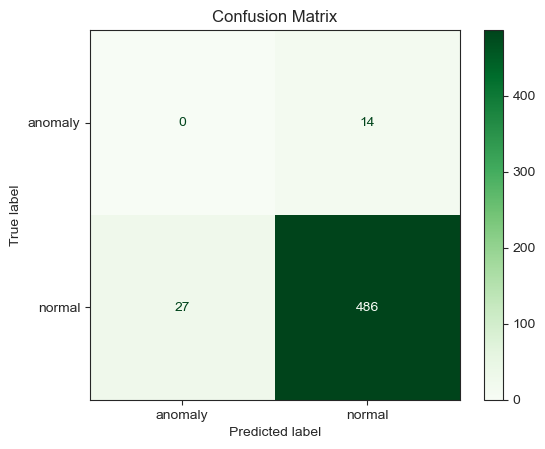

              precision    recall  f1-score   support

     anomaly       0.00      0.00      0.00        14
      normal       0.97      0.95      0.96       513

    accuracy                           0.92       527
   macro avg       0.49      0.47      0.48       527
weighted avg       0.95      0.92      0.93       527



In [136]:
create_confusion_matrix_and_report(i_ocsvm_pred, i_ocsvm_actual, labels)

###### Second Best Data

In [137]:
ii_ocsvm_initial_final_df = combine_df(ii_normals_ocsvm, ii_anomalies_ocsvm)

In [138]:
ii_ocsvm_final_df, ii_ocsvm_pred, ii_ocsvm_actual = add_actual_labels(ii_ocsvm_initial_final_df, label_df)

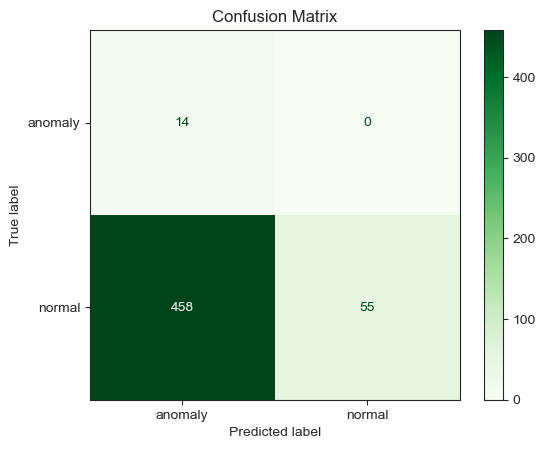

              precision    recall  f1-score   support

     anomaly       0.03      1.00      0.06        14
      normal       1.00      0.11      0.19       513

    accuracy                           0.13       527
   macro avg       0.51      0.55      0.13       527
weighted avg       0.97      0.13      0.19       527



In [139]:
create_confusion_matrix_and_report(ii_ocsvm_pred, ii_ocsvm_actual, labels)

###### Manually Selected Data

In [140]:
t_ocsvm_initial_final_df = combine_df(t_normals_ocsvm, t_anomalies_ocsvm)

In [141]:
t_ocsvm_final_df, t_ocsvm_pred, t_ocsvm_actual = add_actual_labels(t_ocsvm_initial_final_df, label_df)

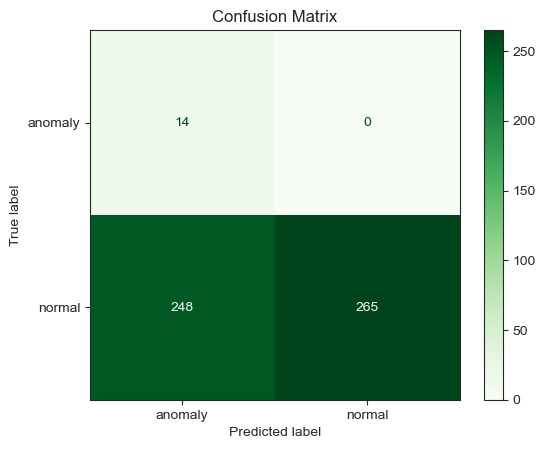

              precision    recall  f1-score   support

     anomaly       0.05      1.00      0.10        14
      normal       1.00      0.52      0.68       513

    accuracy                           0.53       527
   macro avg       0.53      0.76      0.39       527
weighted avg       0.97      0.53      0.67       527



In [142]:
create_confusion_matrix_and_report(t_ocsvm_pred, t_ocsvm_actual, labels)

##### Local Outlier Factor

###### Best Data

In [143]:
i_lof_initial_final_df = combine_df(i_normals_lof, i_anomalies_lof)

In [144]:
i_lof_final_df, i_lof_pred, i_lof_actual = add_actual_labels(i_lof_initial_final_df, label_df)

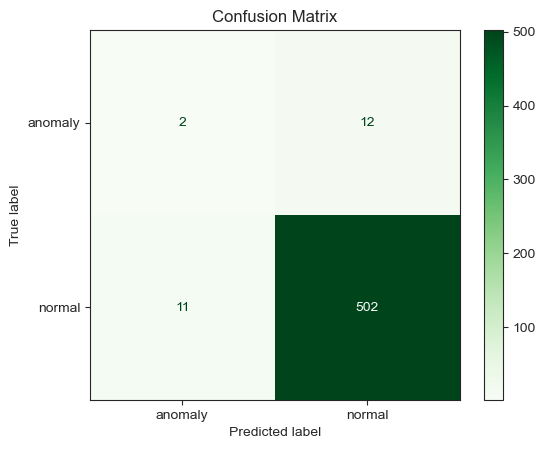

              precision    recall  f1-score   support

     anomaly       0.15      0.14      0.15        14
      normal       0.98      0.98      0.98       513

    accuracy                           0.96       527
   macro avg       0.57      0.56      0.56       527
weighted avg       0.95      0.96      0.96       527



In [145]:
create_confusion_matrix_and_report(i_lof_pred, i_lof_actual, labels)

###### Best Data

In [146]:
ii_lof_initial_final_df = combine_df(ii_normals_lof, ii_anomalies_lof)

In [147]:
ii_lof_final_df, ii_lof_pred, ii_lof_actual = add_actual_labels(ii_lof_initial_final_df, label_df)

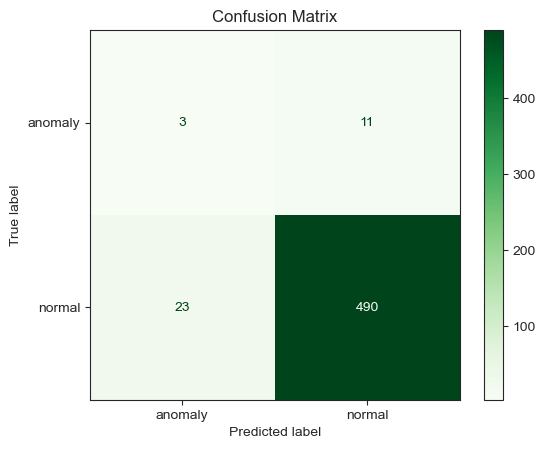

              precision    recall  f1-score   support

     anomaly       0.12      0.21      0.15        14
      normal       0.98      0.96      0.97       513

    accuracy                           0.94       527
   macro avg       0.55      0.58      0.56       527
weighted avg       0.96      0.94      0.94       527



In [148]:
create_confusion_matrix_and_report(ii_lof_pred, ii_lof_actual, labels)

###### Manually Selected Data

In [149]:
t_lof_initial_final_df = combine_df(t_normals_lof, t_anomalies_lof)

In [150]:
t_lof_final_df, t_lof_pred, t_lof_actual = add_actual_labels(t_lof_initial_final_df, label_df)

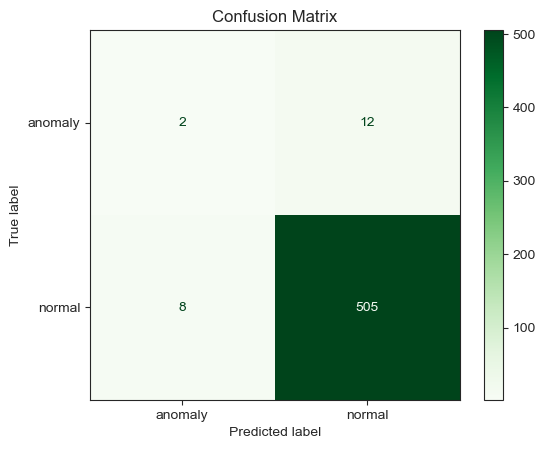

              precision    recall  f1-score   support

     anomaly       0.20      0.14      0.17        14
      normal       0.98      0.98      0.98       513

    accuracy                           0.96       527
   macro avg       0.59      0.56      0.57       527
weighted avg       0.96      0.96      0.96       527



In [151]:
create_confusion_matrix_and_report(t_lof_pred, t_lof_actual, labels)

### Insights

    1. Initial outlier detection using the density-based spatial clustering of the data with complete features revealed potentially okay result as long as the parameters are set properly. Nine (9) outliers (which were verified corect later on) were discovered. Apparently, a large value of epsilon was necessary even though the values of the dataset was standardized. This may be perhaps even with standardized values (expected to be within small range of numerical magnitude), the dataset created a very widely-space world considering its very high-dimensionality, requiring a large epsilon to successfully encapsulate the required minimum number of samples.
    
    2. Subsequently, a series of dimensionality reduction techniques was performed to the dataset. To evaluate which best dataset would fit the other three anomaly detection techniques, KDE, one-class SVM, and LOF, a manual grid-search with silhouette score of the normals of the three method was used as metric. This revealed that for KDE, one-class SVM, and LOF, we have gotten that isomapping, kernel PCA, and PCA for KDE and LOF, while T-SNE for one-class SVM were the best dimensionality techniques to use.  
    
    3. Using the top datasets obtained through dimensionality reduction, anomaly detection while performing manual grid-search to identify the best fitting parameters for KDE, one-class SVM and LOF were performed. Initially checking the top 2 datasets, we could see that isomap produced very poor result for both KDE and one-class SVM showing that most datapoints were evaluated as anomalies. KPCA had the potential for good result. Now in order to limit the pages of this project, other dimensionality reduced data were also tested and it resulted that T-SNE was the most promising method for this dataset hence, it was manually selected to undergo checking. On the other hand, this meant that the initial method in evaluating dimensionality reduction based on the silhouette score of the normals of KDE, one-class SVM and LOF was not very effective.
    
    4. To further evaluate the result of the dimensionality reduction and anomaly detection techniques, an expert system is necessary as simply checking whether the method produced a certain percentage of anomalies was not enough. Now since there is not enough knowledge with regards to the specific topic, search was performed. Fortunately, sufficient information with regards to the "actual" anomalies was given on the dataset, identifying the dates in which the treatment plant had a problem, or that some natural calamities such as typhoon affected the operations. 
    
    5. Utilizing the provided information of the actual anomalies, classification was performed by identifying was the dates corresponding to the anomalies. Since the dataset could be considered a highly imbalanced binary classification, simply relying on the accuracy was not enough, since simply evaluating every datapoints as normal would still yield a high accuracy rate. Also given that this is an anomaly detection, basing the metric on the detection of the anomalies, it could be concluded that utilizing KDE combined with the T-SNE data was effective in finding all the anomalies, with a very small error rate to the normals.